### This notebook looks at the network interactions following network SC lesions. 

In [1]:
# Importage

import warnings
warnings.filterwarnings('ignore')

import os
import sys

import nibabel as nib
from nilearn.image import index_img

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from collections import Counter

import seaborn as sns
import scipy.stats as stats

import pickle

import re

In [6]:
parcs = np.arange(0,200,1)

mask = np.tril_indices(len(parcs), -1)

# Labels
_label_file =  '/external/rprshnas01/kcni/hharita/Code/whobpyt/scratch/Schaefer200_7_Ntwx_labels.txt'

f = open(_label_file, "r")
q = f.read()
q = q.rsplit('\n')
# del q[-32:]
labels = q.copy()
labels = np.array(labels)
labels = labels[parcs]

In [8]:
folder_one_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_II'
folder_two_path = SCs_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Improved_WWD_HCP_model_runs/All_Subs_SC_Wts/Davide_HCP_Data_Matrix'

# Get the list of files in each folder
folder_one_files = os.listdir(folder_one_path)
folder_two_files = os.listdir(folder_two_path)

# Extract the numbers from the filenames in folder_one
folder_one_numbers = []
for file in folder_one_files:
    match = re.search(r'\d+', file)
    if match:
        folder_one_numbers.append(int(match.group()))

# Extract the numbers from the filenames in folder_two
folder_two_numbers = []
for file in folder_two_files:
    match = re.search(r'\d+', file)
    if match:
        folder_two_numbers.append(int(match.group()))

# Find the common numbers between the two folders
common_numbers = list(set(folder_one_numbers) & set(folder_two_numbers))

sub_list = common_numbers.copy()

sub_list.sort()

sub_list = sub_list[0:200]

In [9]:
pconn_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_II/'

In [10]:
def emp_fc(sub_id):
    pconn1LR = pconn_path + '{0}_rfMRI_REST1_RL_Schaefer200_cifti_parcellated.ptseries.nii'.format(sub_id)
    pconn_img1LR = nib.load(pconn1LR)
    pconn_dat1LR = pconn_img1LR.get_data()
    pconn_dat1LR = pconn_dat1LR/1
    return pconn_dat1LR

In [11]:
%%time

all_subs_emp_fc = []
for i in range(len(sub_list)):
    ss_emp_fc = emp_fc(sub_list[i])
    all_subs_emp_fc.append(ss_emp_fc)

CPU times: user 50.4 s, sys: 435 ms, total: 50.8 s
Wall time: 1min 5s


In [12]:
%%time
all_subs_emp_fc_mat = []
for i in range(200):
    all_subs_emp_fc_mat.append(np.corrcoef(all_subs_emp_fc[i].T))

CPU times: user 1.08 s, sys: 548 ms, total: 1.63 s
Wall time: 568 ms


In [13]:
og_whobpyt_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_run_pkls_real_time_conn_mats_only'
lesion_whobpyt_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/Ntwx_Lesion_REST_WhoBPyT_real_time_pkls_and_conn_mats'

In [15]:
params_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_run_pkls_real_time/'

sample_params_file =  params_path + 'Subj_100206_fittingresults_stim_exp_real_time.pkl'

In [16]:
def extract_params_for_sims(sub_id):
    sample_params_file = params_path + 'Subj_{0}_fittingresults_stim_exp_real_time.pkl'.format(sub_id)
    with open(sample_params_file, 'rb') as f:
        data = pickle.load(f)
    posterior_g_value = data.output_sim.g[1200][0]
    posterior_gEE_value = data.output_sim.g_EE[1200][0]
    posterior_g_EI_value = data.output_sim.g_EI[1200][0]
    posterior_gIE_value = data.output_sim.g_IE[1200][0]
    
    return posterior_g_value, posterior_gEE_value, posterior_g_EI_value, posterior_gIE_value

In [17]:
%%time
# This code is to get the posterior values for the fitted params (g, gEE, gEI, gIE) and compare it with the fixed prior values.

# takes ~8 mins

all_subs_posterior_g_value = []
all_subs_posterior_gEE_value = []
all_subs_posterior_gEI_value = []
all_subs_posterior_gIE_value = []


for i in range(200):
#     print('subj ', i+1)
    sub_id = sub_list[i]

    ss_g_value, ss_gEE_value, ss_gEI_value, ss_gIE_value = extract_params_for_sims(sub_id)
    
    all_subs_posterior_g_value.append(ss_g_value)
    all_subs_posterior_gEE_value.append(ss_gEE_value)
    all_subs_posterior_gEI_value.append(ss_gEI_value)
    all_subs_posterior_gIE_value.append(ss_gIE_value)
    
    del ss_g_value, ss_gEE_value, ss_gEI_value, ss_gIE_value

subj  1
subj  2
subj  3
subj  4
subj  5
subj  6
subj  7
subj  8
subj  9
subj  10
subj  11
subj  12
subj  13
subj  14
subj  15
subj  16
subj  17
subj  18
subj  19
subj  20
subj  21
subj  22
subj  23
subj  24
subj  25
subj  26
subj  27
subj  28
subj  29
subj  30
subj  31
subj  32
subj  33
subj  34
subj  35
subj  36
subj  37
subj  38
subj  39
subj  40
subj  41
subj  42
subj  43
subj  44
subj  45
subj  46
subj  47
subj  48
subj  49
subj  50
subj  51
subj  52
subj  53
subj  54
subj  55
subj  56
subj  57
subj  58
subj  59
subj  60
subj  61
subj  62
subj  63
subj  64
subj  65
subj  66
subj  67
subj  68
subj  69
subj  70
subj  71
subj  72
subj  73
subj  74
subj  75
subj  76
subj  77
subj  78
subj  79
subj  80
subj  81
subj  82
subj  83
subj  84
subj  85
subj  86
subj  87
subj  88
subj  89
subj  90
subj  91
subj  92
subj  93
subj  94
subj  95
subj  96
subj  97
subj  98
subj  99
subj  100
subj  101
subj  102
subj  103
subj  104
subj  105
subj  106
subj  107
subj  108
subj  109
subj  110
subj  11

In [19]:
print('posterior g values across 200 subs ...')
print(np.mean(all_subs_posterior_g_value))
print(np.std(all_subs_posterior_g_value))
print(np.max(all_subs_posterior_g_value))
print(np.min(all_subs_posterior_g_value))

print('------------------\n')

print('posterior gEE values across 200 subs ...')
print(np.mean(all_subs_posterior_gEE_value))
print(np.std(all_subs_posterior_gEE_value))
print(np.max(all_subs_posterior_gEE_value))
print(np.min(all_subs_posterior_gEE_value))

print('------------------\n')

print('posterior gEI values across 200 subs ...')
print(np.mean(all_subs_posterior_gEI_value))
print(np.std(all_subs_posterior_gEI_value))
print(np.max(all_subs_posterior_gEI_value))
print(np.min(all_subs_posterior_gEI_value))

print('------------------\n')

print('posterior gIE values across 200 subs ...')
print(np.mean(all_subs_posterior_gIE_value))
print(np.std(all_subs_posterior_gIE_value))
print(np.max(all_subs_posterior_gIE_value))
print(np.min(all_subs_posterior_gIE_value))

posterior g values across 200 subs ...
400.01227
0.15924764
400.46353
399.52786
------------------

posterior gEE values across 200 subs ...
1.5920111
0.08249077
1.7288932
1.3599539
------------------

posterior gEI values across 200 subs ...
0.9892027
0.4068788
1.9879782
0.24481584
------------------

posterior gIE values across 200 subs ...
0.47205108
0.030054284
0.53099597
0.4112527


In [18]:
# the last value is the 'posterior' ...
# take the mean of the all the posterior values across all 200 subjects. Do this for gEE, gEI, gIE, and g. 

# compare this with the 'prior' values which is the same across ALL subjects. As all subjects start at the same values!

In [19]:
# rest_fMRI_real_time_Subj_121921_con_mat.txt
# Subj_121921_smt_lesion_rest_fc_con_mat.txt

In [20]:
%%time

# Load the saved .txt connectiivty matrices. 
# This includes the original whobpyt run (intact SC) = og_whobpyt
# and the SC lesions of the various networks = X_lesion

all_subs_og_whobpyt = []

all_subs_vis_lesion = []
all_subs_sommot_lesion = []
all_subs_dorsattn_lesion = []
all_subs_ventattn_lesion = []
all_subs_limbic_lesion = []
all_subs_fpn_lesion = []
all_subs_dmn_lesion = []

for i in range(len(sub_list)):
    
    sub_id = sub_list[i]
    
    ss_og_whobpyt = np.loadtxt(og_whobpyt_path + '/rest_fMRI_real_time_Subj_{0}_con_mat.txt'.format(sub_id))
    all_subs_og_whobpyt.append(ss_og_whobpyt)
    
    ss_vis_lesion = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_vis_lesion_rest_fc_con_mat.txt'.format(sub_id))
    all_subs_vis_lesion.append(ss_vis_lesion)
   
    ss_sommot_lesion = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_smt_lesion_rest_fc_con_mat.txt'.format(sub_id))
    all_subs_sommot_lesion.append(ss_sommot_lesion)

    ss_dorsattn_lesion = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_dan_lesion_rest_fc_con_mat.txt'.format(sub_id))
    all_subs_dorsattn_lesion.append(ss_dorsattn_lesion)
    
    ss_ventattn_lesion = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_van_lesion_rest_fc_con_mat.txt'.format(sub_id))
    all_subs_ventattn_lesion.append(ss_ventattn_lesion)

    ss_limbic_lesion = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_lim_lesion_rest_fc_con_mat.txt'.format(sub_id))
    all_subs_limbic_lesion.append(ss_limbic_lesion)
   
    ss_fpn_lesion = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_fpn_lesion_rest_fc_con_mat.txt'.format(sub_id))
    all_subs_fpn_lesion.append(ss_fpn_lesion)
    
    ss_dmn_lesion = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_dmn_lesion_rest_fc_con_mat.txt'.format(sub_id))
    all_subs_dmn_lesion.append(ss_dmn_lesion)

CPU times: user 1min 13s, sys: 2.45 s, total: 1min 16s
Wall time: 2min 27s


In [21]:
all_subs_lesion_ntwx = [all_subs_vis_lesion,all_subs_sommot_lesion,
                        all_subs_dorsattn_lesion,all_subs_ventattn_lesion,
                        all_subs_limbic_lesion,all_subs_fpn_lesion,
                        all_subs_dmn_lesion]

In [ ]:
# Correlation of empirical fc to simulated original whobpyt (intact SC) ...



In [25]:
%%time
corr_all_subs = []
for i in range(len(sub_list)):
    corr_all_subs.append(np.corrcoef(all_subs_emp_fc_mat[i][mask],all_subs_og_whobpyt[i][mask])[0][1])
    

print(np.mean(corr_all_subs))
print(np.std(corr_all_subs))

0.6422482416905286
0.051948328853319105
CPU times: user 131 ms, sys: 1.99 ms, total: 133 ms
Wall time: 131 ms


In [26]:
print(np.min(corr_all_subs))
print(np.max(corr_all_subs))

0.4751673060066991
0.7678718813991655


In [ ]:
# Obviously, the fit goes down when you lesion any SC but we don't report these values as they are not relevant here. 

In [28]:
# The following are the label coordinates from the label file for all the networks (LH and RH). See above.

# vis --> (0,14,100,115)
# sommot --> (14,30,115,134)
# dorsattn --> (30,43,134,147)
# ventattn --> (43,54,147,158)
# limbic --> (54,60,158,164)
# fpn --> (60,73,164,181)
# dmn --> (73,100,181,200)

ntwx_labels_idxs = [
[0,14,100,115],
[14,30,115,134],
[30,43,134,147],
[43,54,147,158],
[54,60,158,164],
[60,73,164,181],
[73,100,181,200]]

In [29]:
Ntwx_labels = ['Vis', 'SomMot', 'DorsAttn', 'VentAttn', 'Limbic', 'FPN', 'DMN'] 

# These can be changed to an alternate naming convention (if required):
# Ntwx_labels = ['VN', 'SMN', 'DAN', 'VAN', 'LN', 'FPN', 'DMN'] 

In [30]:
# This function averages the LH, RH and cross-hemispheric fc of each network to every other network. 

def outer_ntwx_only_fc(fc, sub, num):
    
    a, b, c, d = ntwx_labels_idxs[num]
    
    lh_ntwx_to_lh_vis = fc[sub][a:b, 0:14]
    lh_ntwx_to_rh_vis = fc[sub][a:b, 100:115]
    
    lh_ntwx_to_lh_sommot = fc[sub][a:b, 14:30]
    lh_ntwx_to_rh_sommot = fc[sub][a:b, 115:134]
    
    lh_ntwx_to_lh_dorsattn = fc[sub][a:b, 30:43]
    lh_ntwx_to_rh_dorsattn = fc[sub][a:b, 134:147]
    
    lh_ntwx_to_lh_ventattn = fc[sub][a:b, 43:54]
    lh_ntwx_to_rh_ventattn = fc[sub][a:b, 147:158]
    
    lh_ntwx_to_lh_limbic = fc[sub][a:b, 54:60]
    lh_ntwx_to_rh_limbic = fc[sub][a:b, 158:164]
    
    lh_ntwx_to_lh_fpn = fc[sub][a:b, 60:73]
    lh_ntwx_to_rh_fpn = fc[sub][a:b, 164:181]
    
    lh_ntwx_to_lh_dmn = fc[sub][a:b, 73:100]
    lh_ntwx_to_rh_dmn = fc[sub][a:b, 181:200]
    
    # ---------------------------------------------
    
    rh_ntwx_to_lh_vis = fc[sub][c:d, 0:14]
    rh_ntwx_to_rh_vis = fc[sub][c:d, 100:115]
    
    rh_ntwx_to_lh_sommot = fc[sub][c:d, 14:30]
    rh_ntwx_to_rh_sommot = fc[sub][c:d, 115:134]
    
    rh_ntwx_to_lh_dorsattn = fc[sub][c:d, 30:43]
    rh_ntwx_to_rh_dorsattn = fc[sub][c:d, 134:147]
    
    rh_ntwx_to_lh_ventattn = fc[sub][c:d, 43:54]
    rh_ntwx_to_rh_ventattn = fc[sub][c:d, 147:158]
    
    rh_ntwx_to_lh_limbic = fc[sub][c:d, 54:60]
    rh_ntwx_to_rh_limbic = fc[sub][c:d, 158:164]
    
    rh_ntwx_to_lh_fpn = fc[sub][c:d, 60:73]
    rh_ntwx_to_rh_fpn = fc[sub][c:d, 164:181]
    
    rh_ntwx_to_lh_dmn = fc[sub][c:d, 73:100]
    rh_ntwx_to_rh_dmn = fc[sub][c:d, 181:200]
        

    mean_ntwx_to_vis_fc = (((np.mean(lh_ntwx_to_lh_vis) + np.mean(rh_ntwx_to_rh_vis))/2 + (np.mean(lh_ntwx_to_rh_vis) + np.mean(rh_ntwx_to_lh_vis))/2)/2)
    mean_ntwx_to_sommot_fc = (((np.mean(lh_ntwx_to_lh_sommot) + np.mean(rh_ntwx_to_rh_sommot))/2 + (np.mean(lh_ntwx_to_rh_sommot) + np.mean(rh_ntwx_to_lh_sommot))/2)/2)
    mean_ntwx_to_dorsattn_fc = (((np.mean(lh_ntwx_to_lh_dorsattn) + np.mean(rh_ntwx_to_rh_dorsattn))/2 + (np.mean(lh_ntwx_to_rh_dorsattn) + np.mean(rh_ntwx_to_lh_dorsattn))/2)/2)
    mean_ntwx_to_ventattn_fc = (((np.mean(lh_ntwx_to_lh_ventattn) + np.mean(rh_ntwx_to_rh_ventattn))/2 + (np.mean(lh_ntwx_to_rh_ventattn) + np.mean(rh_ntwx_to_lh_ventattn))/2)/2)
    mean_ntwx_to_limbic_fc = (((np.mean(lh_ntwx_to_lh_limbic) + np.mean(rh_ntwx_to_rh_limbic))/2 + (np.mean(lh_ntwx_to_rh_limbic) + np.mean(rh_ntwx_to_lh_limbic))/2)/2)
    mean_ntwx_to_fpn_fc = (((np.mean(lh_ntwx_to_lh_fpn) + np.mean(rh_ntwx_to_rh_fpn))/2 + (np.mean(lh_ntwx_to_rh_fpn) + np.mean(rh_ntwx_to_lh_fpn))/2)/2)
    mean_ntwx_to_dmn_fc = (((np.mean(lh_ntwx_to_lh_dmn) + np.mean(rh_ntwx_to_rh_dmn))/2 + (np.mean(lh_ntwx_to_rh_dmn) + np.mean(rh_ntwx_to_lh_dmn))/2)/2)
    
    
    return mean_ntwx_to_vis_fc, mean_ntwx_to_sommot_fc, mean_ntwx_to_dorsattn_fc, mean_ntwx_to_ventattn_fc, mean_ntwx_to_limbic_fc, mean_ntwx_to_fpn_fc, mean_ntwx_to_dmn_fc

### empirical data

In [31]:
%%time

empirical_vis_to_other_ntwx = []
empirical_sommot_to_other_ntwx = []
empirical_dorsattn_to_other_ntwx = []
empirical_ventattn_to_other_ntwx = []
empirical_limbic_to_other_ntwx = []
empirical_fpn_to_other_ntwx = []
empirical_dmn_to_other_ntwx = []

for i in range(200):
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_emp_fc_mat,i,0)
    empirical_vis_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_emp_fc_mat,i,1)
    empirical_sommot_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_emp_fc_mat,i,2)
    empirical_dorsattn_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_emp_fc_mat,i,3)
    empirical_ventattn_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_emp_fc_mat,i,4)
    empirical_limbic_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_emp_fc_mat,i,5)
    empirical_fpn_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_emp_fc_mat,i,6)
    empirical_dmn_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

CPU times: user 511 ms, sys: 10.8 ms, total: 522 ms
Wall time: 515 ms


In [32]:
empirical_vis_to_other_ntwx = np.mean(empirical_vis_to_other_ntwx,axis=0)
empirical_sommot_to_other_ntwx = np.mean(empirical_sommot_to_other_ntwx,axis=0)
empirical_dorsattn_to_other_ntwx = np.mean(empirical_dorsattn_to_other_ntwx,axis=0)
empirical_ventattn_to_other_ntwx = np.mean(empirical_ventattn_to_other_ntwx,axis=0)
empirical_limbic_to_other_ntwx = np.mean(empirical_limbic_to_other_ntwx,axis=0)
empirical_fpn_to_other_ntwx = np.mean(empirical_fpn_to_other_ntwx,axis=0)
empirical_dmn_to_other_ntwx = np.mean(empirical_dmn_to_other_ntwx,axis=0)

In [33]:
# Across all 200 subs
empirical_outer_to_other_ntwx  = [empirical_vis_to_other_ntwx,empirical_sommot_to_other_ntwx,
                                   empirical_dorsattn_to_other_ntwx,empirical_ventattn_to_other_ntwx,
                                   empirical_limbic_to_other_ntwx,empirical_fpn_to_other_ntwx,
                                   empirical_dmn_to_other_ntwx]

### original WhoBPyT

In [34]:
%%time

all_subs_vis_to_other_ntwx = []
all_subs_sommot_to_other_ntwx = []
all_subs_dorsattn_to_other_ntwx = []
all_subs_ventattn_to_other_ntwx = []
all_subs_limbic_to_other_ntwx = []
all_subs_fpn_to_other_ntwx = []
all_subs_dmn_to_other_ntwx = []

for i in range(200):
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_og_whobpyt,i,0)
    all_subs_vis_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_og_whobpyt,i,1)
    all_subs_sommot_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_og_whobpyt,i,2)
    all_subs_dorsattn_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_og_whobpyt,i,3)
    all_subs_ventattn_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_og_whobpyt,i,4)
    all_subs_limbic_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_og_whobpyt,i,5)
    all_subs_fpn_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_og_whobpyt,i,6)
    all_subs_dmn_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

CPU times: user 499 ms, sys: 18.1 ms, total: 517 ms
Wall time: 507 ms


In [35]:
og_whobpyt_vis_to_other_ntwx = np.mean(all_subs_vis_to_other_ntwx,axis=0)
og_whobpyt_sommot_to_other_ntwx = np.mean(all_subs_sommot_to_other_ntwx,axis=0)
og_whobpyt_dorsattn_to_other_ntwx = np.mean(all_subs_dorsattn_to_other_ntwx,axis=0)
og_whobpyt_ventattn_to_other_ntwx = np.mean(all_subs_ventattn_to_other_ntwx,axis=0)
og_whobpyt_limbic_to_other_ntwx = np.mean(all_subs_limbic_to_other_ntwx,axis=0)
og_whobpyt_fpn_to_other_ntwx = np.mean(all_subs_fpn_to_other_ntwx,axis=0)
og_whobpyt_dmn_to_other_ntwx = np.mean(all_subs_dmn_to_other_ntwx,axis=0)

In [36]:
og_whobpyt_vis_to_other_ntwx_std = np.std(all_subs_vis_to_other_ntwx,axis=0)
og_whobpyt_sommot_to_other_ntwx_std = np.std(all_subs_sommot_to_other_ntwx,axis=0)
og_whobpyt_dorsattn_to_other_ntwx_std = np.std(all_subs_dorsattn_to_other_ntwx,axis=0)
og_whobpyt_ventattn_to_other_ntwx_std = np.std(all_subs_ventattn_to_other_ntwx,axis=0)
og_whobpyt_limbic_to_other_ntwx_std = np.std(all_subs_limbic_to_other_ntwx,axis=0)
og_whobpyt_fpn_to_other_ntwx_std = np.std(all_subs_fpn_to_other_ntwx,axis=0)
og_whobpyt_dmn_to_other_ntwx_std = np.std(all_subs_dmn_to_other_ntwx,axis=0)

In [37]:
# Across all 200 subs
og_whobpyt_outer_to_other_ntwx  = [og_whobpyt_vis_to_other_ntwx,og_whobpyt_sommot_to_other_ntwx,
                                   og_whobpyt_dorsattn_to_other_ntwx,og_whobpyt_ventattn_to_other_ntwx,
                                   og_whobpyt_limbic_to_other_ntwx,og_whobpyt_fpn_to_other_ntwx,
                                   og_whobpyt_dmn_to_other_ntwx]

In [38]:
og_whobpyt_outer_to_other_ntwx_std = [og_whobpyt_vis_to_other_ntwx_std,og_whobpyt_sommot_to_other_ntwx_std,
                                      og_whobpyt_dorsattn_to_other_ntwx_std,og_whobpyt_ventattn_to_other_ntwx_std,
                                      og_whobpyt_limbic_to_other_ntwx_std,og_whobpyt_fpn_to_other_ntwx_std,
                                      og_whobpyt_dmn_to_other_ntwx_std]

### Lesion WhoBPyT

In [40]:
def get_outer_ntwx_fc(fc):
    
    all_subs_vis_to_other_ntwx_lesions = []
    all_subs_sommot_to_other_ntwx_lesions = []
    all_subs_dorsattn_to_other_ntwx_lesions = []
    all_subs_ventattn_to_other_ntwx_lesions = []
    all_subs_limbic_to_other_ntwx_lesions = []
    all_subs_fpn_to_other_ntwx_lesions = []
    all_subs_dmn_to_other_ntwx_lesions = []

    for i in range(200):
        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,0)
        all_subs_vis_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,1)
        all_subs_sommot_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,2)
        all_subs_dorsattn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,3)
        all_subs_ventattn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,4)
        all_subs_limbic_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,5)
        all_subs_fpn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,6)
        all_subs_dmn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn
        
    mean_all_subs_vis_to_other_ntwx_lesions = np.mean(all_subs_vis_to_other_ntwx_lesions,axis=0)
    mean_all_subs_sommot_to_other_ntwx_lesions = np.mean(all_subs_sommot_to_other_ntwx_lesions,axis=0)
    mean_all_subs_dorsattn_to_other_ntwx_lesions = np.mean(all_subs_dorsattn_to_other_ntwx_lesions,axis=0)
    mean_all_subs_ventattn_to_other_ntwx_lesions = np.mean(all_subs_ventattn_to_other_ntwx_lesions,axis=0)
    mean_all_subs_limbic_to_other_ntwx_lesions = np.mean(all_subs_limbic_to_other_ntwx_lesions,axis=0)
    mean_all_subs_fpn_to_other_ntwx_lesions = np.mean(all_subs_fpn_to_other_ntwx_lesions,axis=0)
    mean_all_subs_dmn_to_other_ntwx_lesions = np.mean(all_subs_dmn_to_other_ntwx_lesions,axis=0)
    
    return mean_all_subs_vis_to_other_ntwx_lesions,mean_all_subs_sommot_to_other_ntwx_lesions,mean_all_subs_dorsattn_to_other_ntwx_lesions,mean_all_subs_ventattn_to_other_ntwx_lesions,mean_all_subs_limbic_to_other_ntwx_lesions,mean_all_subs_fpn_to_other_ntwx_lesions,mean_all_subs_dmn_to_other_ntwx_lesions

In [41]:
def get_outer_ntwx_fc_std(fc):
    
    all_subs_vis_to_other_ntwx_lesions = []
    all_subs_sommot_to_other_ntwx_lesions = []
    all_subs_dorsattn_to_other_ntwx_lesions = []
    all_subs_ventattn_to_other_ntwx_lesions = []
    all_subs_limbic_to_other_ntwx_lesions = []
    all_subs_fpn_to_other_ntwx_lesions = []
    all_subs_dmn_to_other_ntwx_lesions = []

    for i in range(200):
        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,0)
        all_subs_vis_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,1)
        all_subs_sommot_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,2)
        all_subs_dorsattn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,3)
        all_subs_ventattn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,4)
        all_subs_limbic_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,5)
        all_subs_fpn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,6)
        all_subs_dmn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn
        
    std_all_subs_vis_to_other_ntwx_lesions = np.std(all_subs_vis_to_other_ntwx_lesions,axis=0)
    std_all_subs_sommot_to_other_ntwx_lesions = np.std(all_subs_sommot_to_other_ntwx_lesions,axis=0)
    std_all_subs_dorsattn_to_other_ntwx_lesions = np.std(all_subs_dorsattn_to_other_ntwx_lesions,axis=0)
    std_all_subs_ventattn_to_other_ntwx_lesions = np.std(all_subs_ventattn_to_other_ntwx_lesions,axis=0)
    std_all_subs_limbic_to_other_ntwx_lesions = np.std(all_subs_limbic_to_other_ntwx_lesions,axis=0)
    std_all_subs_fpn_to_other_ntwx_lesions = np.std(all_subs_fpn_to_other_ntwx_lesions,axis=0)
    std_all_subs_dmn_to_other_ntwx_lesions = np.std(all_subs_dmn_to_other_ntwx_lesions,axis=0)
    
    return std_all_subs_vis_to_other_ntwx_lesions,std_all_subs_sommot_to_other_ntwx_lesions,std_all_subs_dorsattn_to_other_ntwx_lesions,std_all_subs_ventattn_to_other_ntwx_lesions,std_all_subs_limbic_to_other_ntwx_lesions,std_all_subs_fpn_to_other_ntwx_lesions,std_all_subs_dmn_to_other_ntwx_lesions

In [42]:
def get_outer_ntwx_fc_all_subs(fc):
    
    all_subs_vis_to_other_ntwx_lesions = []
    all_subs_sommot_to_other_ntwx_lesions = []
    all_subs_dorsattn_to_other_ntwx_lesions = []
    all_subs_ventattn_to_other_ntwx_lesions = []
    all_subs_limbic_to_other_ntwx_lesions = []
    all_subs_fpn_to_other_ntwx_lesions = []
    all_subs_dmn_to_other_ntwx_lesions = []

    for i in range(200):
        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,0)
        all_subs_vis_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,1)
        all_subs_sommot_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,2)
        all_subs_dorsattn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,3)
        all_subs_ventattn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,4)
        all_subs_limbic_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,5)
        all_subs_fpn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,6)
        all_subs_dmn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn
        
    return all_subs_vis_to_other_ntwx_lesions,all_subs_sommot_to_other_ntwx_lesions,all_subs_dorsattn_to_other_ntwx_lesions,all_subs_ventattn_to_other_ntwx_lesions,all_subs_limbic_to_other_ntwx_lesions,all_subs_fpn_to_other_ntwx_lesions,all_subs_dmn_to_other_ntwx_lesions

In [43]:
len(all_subs_vis_lesion)

200

# Mean

In [44]:
%%time

# a,b,c,d,e,f,g = get_outer_ntwx_fc(all_subs_og_whobpyt)

vis_lesion_vis_to_other_ntwx, vis_lesion_sommot_to_other_ntwx, vis_lesion_dorsattn_to_other_ntwx, vis_lesion_ventattn_to_other_ntwx, vis_lesion_limbic_to_other_ntwx, vis_lesion_fpn_to_other_ntwx, vis_lesion_dmn_to_other_ntwx = get_outer_ntwx_fc(all_subs_vis_lesion)

sommot_lesion_vis_to_other_ntwx, sommot_lesion_sommot_to_other_ntwx, sommot_lesion_dorsattn_to_other_ntwx, sommot_lesion_ventattn_to_other_ntwx, sommot_lesion_limbic_to_other_ntwx, sommot_lesion_fpn_to_other_ntwx, sommot_lesion_dmn_to_other_ntwx = get_outer_ntwx_fc(all_subs_sommot_lesion)

dorsattn_lesion_vis_to_other_ntwx, dorsattn_lesion_sommot_to_other_ntwx, dorsattn_lesion_dorsattn_to_other_ntwx, dorsattn_lesion_ventattn_to_other_ntwx, dorsattn_lesion_limbic_to_other_ntwx, dorsattn_lesion_fpn_to_other_ntwx, dorsattn_lesion_dmn_to_other_ntwx = get_outer_ntwx_fc(all_subs_dorsattn_lesion)

ventattn_lesion_vis_to_other_ntwx, ventattn_lesion_sommot_to_other_ntwx, ventattn_lesion_dorsattn_to_other_ntwx, ventattn_lesion_ventattn_to_other_ntwx, ventattn_lesion_limbic_to_other_ntwx, ventattn_lesion_fpn_to_other_ntwx, ventattn_lesion_dmn_to_other_ntwx = get_outer_ntwx_fc(all_subs_ventattn_lesion)

limbic_lesion_vis_to_other_ntwx, limbic_lesion_sommot_to_other_ntwx, limbic_lesion_dorsattn_to_other_ntwx, limbic_lesion_ventattn_to_other_ntwx, limbic_lesion_limbic_to_other_ntwx, limbic_lesion_fpn_to_other_ntwx, limbic_lesion_dmn_to_other_ntwx = get_outer_ntwx_fc(all_subs_limbic_lesion)

fpn_lesion_vis_to_other_ntwx, fpn_lesion_sommot_to_other_ntwx, fpn_lesion_dorsattn_to_other_ntwx, fpn_lesion_ventattn_to_other_ntwx, fpn_lesion_limbic_to_other_ntwx, fpn_lesion_fpn_to_other_ntwx, fpn_lesion_dmn_to_other_ntwx = get_outer_ntwx_fc(all_subs_fpn_lesion)

dmn_lesion_vis_to_other_ntwx, dmn_lesion_sommot_to_other_ntwx, dmn_lesion_dorsattn_to_other_ntwx, dmn_lesion_ventattn_to_other_ntwx, dmn_lesion_limbic_to_other_ntwx, dmn_lesion_fpn_to_other_ntwx, dmn_lesion_dmn_to_other_ntwx = get_outer_ntwx_fc(all_subs_dmn_lesion)


CPU times: user 4.09 s, sys: 18.9 ms, total: 4.11 s
Wall time: 4.1 s


In [45]:
vis_lesion_outer_to_other_ntwx = [vis_lesion_vis_to_other_ntwx, vis_lesion_sommot_to_other_ntwx, vis_lesion_dorsattn_to_other_ntwx, vis_lesion_ventattn_to_other_ntwx, vis_lesion_limbic_to_other_ntwx, vis_lesion_fpn_to_other_ntwx, vis_lesion_dmn_to_other_ntwx]
sommot_lesion_outer_to_other_ntwx = [sommot_lesion_vis_to_other_ntwx, sommot_lesion_sommot_to_other_ntwx, sommot_lesion_dorsattn_to_other_ntwx, sommot_lesion_ventattn_to_other_ntwx, sommot_lesion_limbic_to_other_ntwx, sommot_lesion_fpn_to_other_ntwx, sommot_lesion_dmn_to_other_ntwx]
dorsattn_lesion_outer_to_other_ntwx = [dorsattn_lesion_vis_to_other_ntwx, dorsattn_lesion_sommot_to_other_ntwx, dorsattn_lesion_dorsattn_to_other_ntwx, dorsattn_lesion_ventattn_to_other_ntwx, dorsattn_lesion_limbic_to_other_ntwx, dorsattn_lesion_fpn_to_other_ntwx, dorsattn_lesion_dmn_to_other_ntwx]
ventattn_lesion_outer_to_other_ntwx = [ventattn_lesion_vis_to_other_ntwx, ventattn_lesion_sommot_to_other_ntwx, ventattn_lesion_dorsattn_to_other_ntwx, ventattn_lesion_ventattn_to_other_ntwx, ventattn_lesion_limbic_to_other_ntwx, ventattn_lesion_fpn_to_other_ntwx, ventattn_lesion_dmn_to_other_ntwx]
limbic_lesion_outer_to_other_ntwx = [limbic_lesion_vis_to_other_ntwx, limbic_lesion_sommot_to_other_ntwx, limbic_lesion_dorsattn_to_other_ntwx, limbic_lesion_ventattn_to_other_ntwx, limbic_lesion_limbic_to_other_ntwx, limbic_lesion_fpn_to_other_ntwx, limbic_lesion_dmn_to_other_ntwx]
fpn_lesion_outer_to_other_ntwx = [fpn_lesion_vis_to_other_ntwx, fpn_lesion_sommot_to_other_ntwx, fpn_lesion_dorsattn_to_other_ntwx, fpn_lesion_ventattn_to_other_ntwx, fpn_lesion_limbic_to_other_ntwx, fpn_lesion_fpn_to_other_ntwx, fpn_lesion_dmn_to_other_ntwx]
dmn_lesion_outer_to_other_ntwx = [dmn_lesion_vis_to_other_ntwx, dmn_lesion_sommot_to_other_ntwx, dmn_lesion_dorsattn_to_other_ntwx, dmn_lesion_ventattn_to_other_ntwx, dmn_lesion_limbic_to_other_ntwx, dmn_lesion_fpn_to_other_ntwx, dmn_lesion_dmn_to_other_ntwx]

In [46]:
og_whobpyt_outer_to_other_ntwx = [arr.tolist() for arr in og_whobpyt_outer_to_other_ntwx]


vis_lesion_outer_to_other_ntwx = [arr.tolist() for arr in vis_lesion_outer_to_other_ntwx]
sommot_lesion_outer_to_other_ntwx = [arr.tolist() for arr in sommot_lesion_outer_to_other_ntwx]
dorsattn_lesion_outer_to_other_ntwx = [arr.tolist() for arr in dorsattn_lesion_outer_to_other_ntwx]
ventattn_lesion_outer_to_other_ntwx = [arr.tolist() for arr in ventattn_lesion_outer_to_other_ntwx]
limbic_lesion_outer_to_other_ntwx = [arr.tolist() for arr in limbic_lesion_outer_to_other_ntwx]
fpn_lesion_outer_to_other_ntwx = [arr.tolist() for arr in fpn_lesion_outer_to_other_ntwx]
dmn_lesion_outer_to_other_ntwx = [arr.tolist() for arr in dmn_lesion_outer_to_other_ntwx]

# Standard Deviation

In [47]:
vis_lesion_std_vis_to_other_ntwx, vis_lesion_std_sommot_to_other_ntwx, vis_lesion_std_dorsattn_to_other_ntwx, vis_lesion_std_ventattn_to_other_ntwx, vis_lesion_std_limbic_to_other_ntwx, vis_lesion_std_fpn_to_other_ntwx, vis_lesion_std_dmn_to_other_ntwx = get_outer_ntwx_fc_std(all_subs_vis_lesion)

sommot_lesion_std_vis_to_other_ntwx, sommot_lesion_std_sommot_to_other_ntwx, sommot_lesion_std_dorsattn_to_other_ntwx, sommot_lesion_std_ventattn_to_other_ntwx, sommot_lesion_std_limbic_to_other_ntwx, sommot_lesion_std_fpn_to_other_ntwx, sommot_lesion_std_dmn_to_other_ntwx = get_outer_ntwx_fc_std(all_subs_sommot_lesion)

dorsattn_lesion_std_vis_to_other_ntwx, dorsattn_lesion_std_sommot_to_other_ntwx, dorsattn_lesion_std_dorsattn_to_other_ntwx, dorsattn_lesion_std_ventattn_to_other_ntwx, dorsattn_lesion_std_limbic_to_other_ntwx, dorsattn_lesion_std_fpn_to_other_ntwx, dorsattn_lesion_std_dmn_to_other_ntwx = get_outer_ntwx_fc_std(all_subs_dorsattn_lesion)

ventattn_lesion_std_vis_to_other_ntwx, ventattn_lesion_std_sommot_to_other_ntwx, ventattn_lesion_std_dorsattn_to_other_ntwx, ventattn_lesion_std_ventattn_to_other_ntwx, ventattn_lesion_std_limbic_to_other_ntwx, ventattn_lesion_std_fpn_to_other_ntwx, ventattn_lesion_std_dmn_to_other_ntwx = get_outer_ntwx_fc_std(all_subs_ventattn_lesion)

limbic_lesion_std_vis_to_other_ntwx, limbic_lesion_std_sommot_to_other_ntwx, limbic_lesion_std_dorsattn_to_other_ntwx, limbic_lesion_std_ventattn_to_other_ntwx, limbic_lesion_std_limbic_to_other_ntwx, limbic_lesion_std_fpn_to_other_ntwx, limbic_lesion_std_dmn_to_other_ntwx = get_outer_ntwx_fc_std(all_subs_limbic_lesion)

fpn_lesion_std_vis_to_other_ntwx, fpn_lesion_std_sommot_to_other_ntwx, fpn_lesion_std_dorsattn_to_other_ntwx, fpn_lesion_std_ventattn_to_other_ntwx, fpn_lesion_std_limbic_to_other_ntwx, fpn_lesion_std_fpn_to_other_ntwx, fpn_lesion_std_dmn_to_other_ntwx = get_outer_ntwx_fc_std(all_subs_fpn_lesion)

dmn_lesion_std_vis_to_other_ntwx, dmn_lesion_std_sommot_to_other_ntwx, dmn_lesion_std_dorsattn_to_other_ntwx, dmn_lesion_std_ventattn_to_other_ntwx, dmn_lesion_std_limbic_to_other_ntwx, dmn_lesion_std_fpn_to_other_ntwx, dmn_lesion_std_dmn_to_other_ntwx = get_outer_ntwx_fc_std(all_subs_dmn_lesion)

In [48]:
vis_lesion_std_outer_to_other_ntwx = [vis_lesion_std_vis_to_other_ntwx, vis_lesion_std_sommot_to_other_ntwx, vis_lesion_std_dorsattn_to_other_ntwx, vis_lesion_std_ventattn_to_other_ntwx, vis_lesion_std_limbic_to_other_ntwx, vis_lesion_std_fpn_to_other_ntwx, vis_lesion_std_dmn_to_other_ntwx]
sommot_lesion_std_outer_to_other_ntwx = [sommot_lesion_std_vis_to_other_ntwx, sommot_lesion_std_sommot_to_other_ntwx, sommot_lesion_std_dorsattn_to_other_ntwx, sommot_lesion_std_ventattn_to_other_ntwx, sommot_lesion_std_limbic_to_other_ntwx, sommot_lesion_std_fpn_to_other_ntwx, sommot_lesion_std_dmn_to_other_ntwx]
dorsattn_lesion_std_outer_to_other_ntwx = [dorsattn_lesion_std_vis_to_other_ntwx, dorsattn_lesion_std_sommot_to_other_ntwx, dorsattn_lesion_std_dorsattn_to_other_ntwx, dorsattn_lesion_std_ventattn_to_other_ntwx, dorsattn_lesion_std_limbic_to_other_ntwx, dorsattn_lesion_std_fpn_to_other_ntwx, dorsattn_lesion_std_dmn_to_other_ntwx]
ventattn_lesion_std_outer_to_other_ntwx = [ventattn_lesion_std_vis_to_other_ntwx, ventattn_lesion_std_sommot_to_other_ntwx, ventattn_lesion_std_dorsattn_to_other_ntwx, ventattn_lesion_std_ventattn_to_other_ntwx, ventattn_lesion_std_limbic_to_other_ntwx, ventattn_lesion_std_fpn_to_other_ntwx, ventattn_lesion_std_dmn_to_other_ntwx]
limbic_lesion_std_outer_to_other_ntwx = [limbic_lesion_std_vis_to_other_ntwx, limbic_lesion_std_sommot_to_other_ntwx, limbic_lesion_std_dorsattn_to_other_ntwx, limbic_lesion_std_ventattn_to_other_ntwx, limbic_lesion_std_limbic_to_other_ntwx, limbic_lesion_std_fpn_to_other_ntwx, limbic_lesion_std_dmn_to_other_ntwx]
fpn_lesion_std_outer_to_other_ntwx = [fpn_lesion_std_vis_to_other_ntwx, fpn_lesion_std_sommot_to_other_ntwx, fpn_lesion_std_dorsattn_to_other_ntwx, fpn_lesion_std_ventattn_to_other_ntwx, fpn_lesion_std_limbic_to_other_ntwx, fpn_lesion_std_fpn_to_other_ntwx, fpn_lesion_std_dmn_to_other_ntwx]
dmn_lesion_std_outer_to_other_ntwx = [dmn_lesion_std_vis_to_other_ntwx, dmn_lesion_std_sommot_to_other_ntwx, dmn_lesion_std_dorsattn_to_other_ntwx, dmn_lesion_std_ventattn_to_other_ntwx, dmn_lesion_std_limbic_to_other_ntwx, dmn_lesion_std_fpn_to_other_ntwx, dmn_lesion_std_dmn_to_other_ntwx]

In [49]:
og_whobpyt_outer_to_other_ntwx_std = [arr.tolist() for arr in og_whobpyt_outer_to_other_ntwx_std]


vis_lesion_outer_to_other_ntwx_std = [arr.tolist() for arr in vis_lesion_std_outer_to_other_ntwx]
sommot_lesion_outer_to_other_ntwx_std = [arr.tolist() for arr in sommot_lesion_std_outer_to_other_ntwx]
dorsattn_lesion_outer_to_other_ntwx_std = [arr.tolist() for arr in dorsattn_lesion_std_outer_to_other_ntwx]
ventattn_lesion_outer_to_other_ntwx_std = [arr.tolist() for arr in ventattn_lesion_std_outer_to_other_ntwx]
limbic_lesion_outer_to_other_ntwx_std = [arr.tolist() for arr in limbic_lesion_std_outer_to_other_ntwx]
fpn_lesion_outer_to_other_ntwx_std = [arr.tolist() for arr in fpn_lesion_std_outer_to_other_ntwx]
dmn_lesion_outer_to_other_ntwx_std = [arr.tolist() for arr in dmn_lesion_std_outer_to_other_ntwx]

### ------------------------------------------------------------------------------------------

In [50]:
%%time

# For stats

# a,b,c,d,e,f,g = get_outer_ntwx_fc(all_subs_og_whobpyt)

vis_lesion_all_subs_vis_to_other_ntwx, vis_lesion_all_subs_smt_to_other_ntwx, vis_lesion_all_subs_dan_to_other_ntwx, vis_lesion_all_subs_van_to_other_ntwx, vis_lesion_all_subs_lim_to_other_ntwx, vis_lesion_all_subs_fpn_to_other_ntwx, vis_lesion_all_subs_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_vis_lesion)

smt_lesion_all_subs_vis_to_other_ntwx, smt_lesion_all_subs_smt_to_other_ntwx, smt_lesion_all_subs_dan_to_other_ntwx, smt_lesion_all_subs_van_to_other_ntwx, smt_lesion_all_subs_lim_to_other_ntwx, smt_lesion_all_subs_fpn_to_other_ntwx, smt_lesion_all_subs_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_sommot_lesion)

dan_lesion_all_subs_vis_to_other_ntwx, dan_lesion_all_subs_smt_to_other_ntwx, dan_lesion_all_subs_dan_to_other_ntwx, dan_lesion_all_subs_van_to_other_ntwx, dan_lesion_all_subs_lim_to_other_ntwx, dan_lesion_all_subs_fpn_to_other_ntwx, dan_lesion_all_subs_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_dorsattn_lesion)

van_lesion_all_subs_vis_to_other_ntwx, van_lesion_all_subs_smt_to_other_ntwx, van_lesion_all_subs_dan_to_other_ntwx, van_lesion_all_subs_van_to_other_ntwx, van_lesion_all_subs_lim_to_other_ntwx, van_lesion_all_subs_fpn_to_other_ntwx, van_lesion_all_subs_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_ventattn_lesion)

lim_lesion_all_subs_vis_to_other_ntwx, lim_lesion_all_subs_smt_to_other_ntwx, lim_lesion_all_subs_dan_to_other_ntwx, lim_lesion_all_subs_van_to_other_ntwx, lim_lesion_all_subs_lim_to_other_ntwx, lim_lesion_all_subs_fpn_to_other_ntwx, lim_lesion_all_subs_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_limbic_lesion)

fpn_lesion_all_subs_vis_to_other_ntwx, fpn_lesion_all_subs_smt_to_other_ntwx, fpn_lesion_all_subs_dan_to_other_ntwx, fpn_lesion_all_subs_van_to_other_ntwx, fpn_lesion_all_subs_lim_to_other_ntwx, fpn_lesion_all_subs_fpn_to_other_ntwx, fpn_lesion_all_subs_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_fpn_lesion)

dmn_lesion_all_subs_vis_to_other_ntwx, dmn_lesion_all_subs_smt_to_other_ntwx, dmn_lesion_all_subs_dan_to_other_ntwx, dmn_lesion_all_subs_van_to_other_ntwx, dmn_lesion_all_subs_lim_to_other_ntwx, dmn_lesion_all_subs_fpn_to_other_ntwx, dmn_lesion_all_subs_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_dmn_lesion)


CPU times: user 3.57 s, sys: 34.5 ms, total: 3.6 s
Wall time: 3.58 s


In [51]:
og_whobpyt_all_subs_vis_to_other_ntwx, og_whobpyt_all_subs_smt_to_other_ntwx, og_whobpyt_all_subs_dan_to_other_ntwx, og_whobpyt_all_subs_van_to_other_ntwx, og_whobpyt_all_subs_lim_to_other_ntwx, og_whobpyt_all_subs_fpn_to_other_ntwx, og_whobpyt_all_subs_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_og_whobpyt)


In [52]:
# For stats

In [53]:
og_whobpyt_all_subs_outer_to_other_ntwx = [og_whobpyt_all_subs_vis_to_other_ntwx, og_whobpyt_all_subs_smt_to_other_ntwx, og_whobpyt_all_subs_dan_to_other_ntwx, og_whobpyt_all_subs_van_to_other_ntwx, og_whobpyt_all_subs_lim_to_other_ntwx, og_whobpyt_all_subs_fpn_to_other_ntwx, og_whobpyt_all_subs_dmn_to_other_ntwx]

vis_lesion_all_subs_outer_to_other_ntwx = [vis_lesion_all_subs_vis_to_other_ntwx, vis_lesion_all_subs_smt_to_other_ntwx, vis_lesion_all_subs_dan_to_other_ntwx, vis_lesion_all_subs_van_to_other_ntwx, vis_lesion_all_subs_lim_to_other_ntwx, vis_lesion_all_subs_fpn_to_other_ntwx, vis_lesion_all_subs_dmn_to_other_ntwx]
smt_lesion_all_subs_outer_to_other_ntwx = [smt_lesion_all_subs_vis_to_other_ntwx, smt_lesion_all_subs_smt_to_other_ntwx, smt_lesion_all_subs_dan_to_other_ntwx, smt_lesion_all_subs_van_to_other_ntwx, smt_lesion_all_subs_lim_to_other_ntwx, smt_lesion_all_subs_fpn_to_other_ntwx, smt_lesion_all_subs_dmn_to_other_ntwx]
dan_lesion_all_subs_outer_to_other_ntwx = [dan_lesion_all_subs_vis_to_other_ntwx, dan_lesion_all_subs_smt_to_other_ntwx, dan_lesion_all_subs_dan_to_other_ntwx, dan_lesion_all_subs_van_to_other_ntwx, dan_lesion_all_subs_lim_to_other_ntwx, dan_lesion_all_subs_fpn_to_other_ntwx, dan_lesion_all_subs_dmn_to_other_ntwx]
van_lesion_all_subs_outer_to_other_ntwx = [van_lesion_all_subs_vis_to_other_ntwx, van_lesion_all_subs_smt_to_other_ntwx, van_lesion_all_subs_dan_to_other_ntwx, van_lesion_all_subs_van_to_other_ntwx, van_lesion_all_subs_lim_to_other_ntwx, van_lesion_all_subs_fpn_to_other_ntwx, van_lesion_all_subs_dmn_to_other_ntwx]
lim_lesion_all_subs_outer_to_other_ntwx = [lim_lesion_all_subs_vis_to_other_ntwx, lim_lesion_all_subs_smt_to_other_ntwx, lim_lesion_all_subs_dan_to_other_ntwx, lim_lesion_all_subs_van_to_other_ntwx, lim_lesion_all_subs_lim_to_other_ntwx, lim_lesion_all_subs_fpn_to_other_ntwx, lim_lesion_all_subs_dmn_to_other_ntwx]
fpn_lesion_all_subs_outer_to_other_ntwx = [fpn_lesion_all_subs_vis_to_other_ntwx, fpn_lesion_all_subs_smt_to_other_ntwx, fpn_lesion_all_subs_dan_to_other_ntwx, fpn_lesion_all_subs_van_to_other_ntwx, fpn_lesion_all_subs_lim_to_other_ntwx, fpn_lesion_all_subs_fpn_to_other_ntwx, fpn_lesion_all_subs_dmn_to_other_ntwx]
dmn_lesion_all_subs_outer_to_other_ntwx = [dmn_lesion_all_subs_vis_to_other_ntwx, dmn_lesion_all_subs_smt_to_other_ntwx, dmn_lesion_all_subs_dan_to_other_ntwx, dmn_lesion_all_subs_van_to_other_ntwx, dmn_lesion_all_subs_lim_to_other_ntwx, dmn_lesion_all_subs_fpn_to_other_ntwx, dmn_lesion_all_subs_dmn_to_other_ntwx]

In [56]:
_var = [og_whobpyt_outer_to_other_ntwx,
vis_lesion_outer_to_other_ntwx,
sommot_lesion_outer_to_other_ntwx,
dorsattn_lesion_outer_to_other_ntwx,
ventattn_lesion_outer_to_other_ntwx,
limbic_lesion_outer_to_other_ntwx,
fpn_lesion_outer_to_other_ntwx,
dmn_lesion_outer_to_other_ntwx]

In [58]:
# not means ... individual 7x7 values ...

def mean_percent_drops_all_vals(ntwx_list,idx):
    percent_change_all_ntwx_lesion = []
    for i in range(7):
        percent_change_ntwx = [((b-a)/a)*100 for a,b in zip(og_whobpyt_outer_to_other_ntwx[i],ntwx_list[i])]
#         percent_change_ntwx = [b-a for a,b in zip(og_whobpyt_outer_to_other_ntwx[i],ntwx_list[i])]
        percent_change_all_ntwx_lesion.append(percent_change_ntwx)
        
#     for j in range(7):
#         if j!=idx:
#             del percent_change_all_ntwx_lesion[j][idx]
    
       
    return percent_change_all_ntwx_lesion

In [59]:
percent_change_vis = mean_percent_drops_all_vals(vis_lesion_outer_to_other_ntwx,0)
percent_change_smt = mean_percent_drops_all_vals(sommot_lesion_outer_to_other_ntwx,1)
percent_change_dan = mean_percent_drops_all_vals(dorsattn_lesion_outer_to_other_ntwx,2)
percent_change_van = mean_percent_drops_all_vals(ventattn_lesion_outer_to_other_ntwx,3)
percent_change_lim = mean_percent_drops_all_vals(limbic_lesion_outer_to_other_ntwx,4)
percent_change_fpn = mean_percent_drops_all_vals(fpn_lesion_outer_to_other_ntwx,5)
percent_change_dmn = mean_percent_drops_all_vals(dmn_lesion_outer_to_other_ntwx,6)

In [61]:
percent_change_all_ntwx_all_vals = [percent_change_vis,percent_change_smt,percent_change_dan,
                                    percent_change_van,percent_change_lim,percent_change_fpn,
                                    percent_change_dmn]

In [62]:
Ntwx_labels = ['VIS', 'SMT', 'DAN', 'VAN', 'LIM', 'FPN', 'DMN']

In [1]:
# for i in range(7):
#     print(Ntwx_labels[i], 'lesion')
#     for j in range(7):
#         print(percent_change_all_ntwx_all_vals[i][j])
#         print('')
#     print('------------------------------------------------------------------------')

In [65]:
percent_change_all_ntwx_all_vals = np.array(percent_change_all_ntwx_all_vals)

In [66]:
import numpy.ma as ma

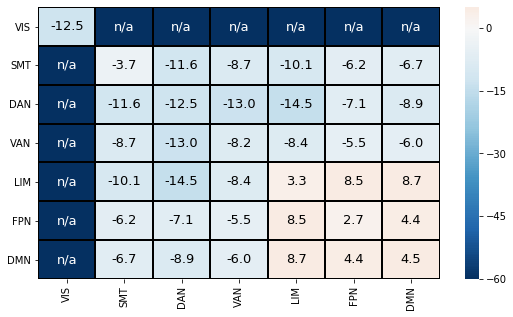

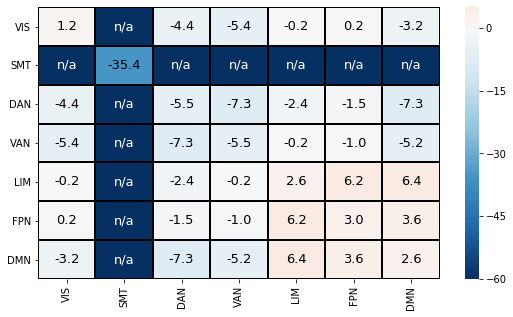

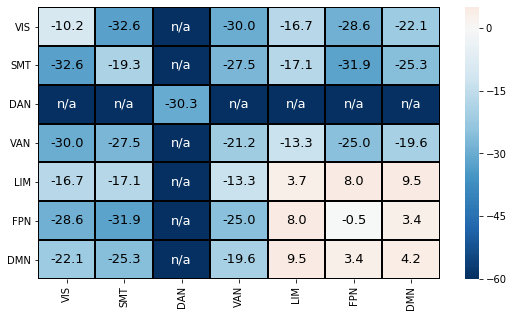

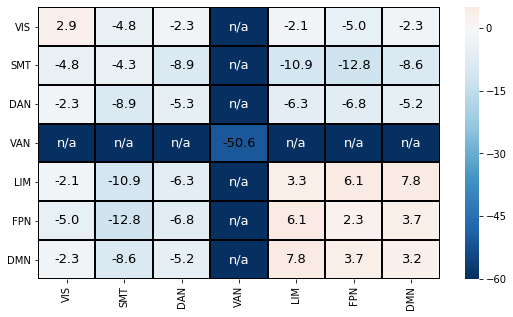

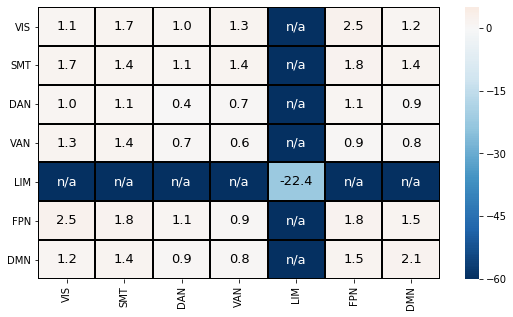

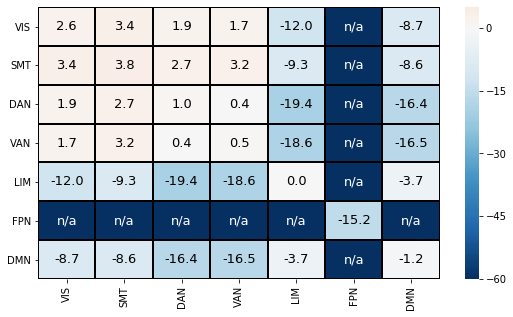

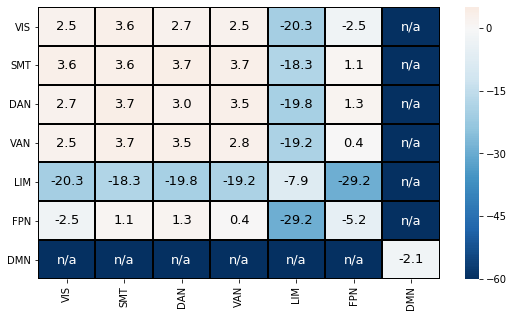

In [67]:
for i in range(7):
    fig, ax = plt.subplots(figsize=(9,5))
    
    sns.heatmap(percent_change_all_ntwx_all_vals[i,:,:],cmap='RdBu_r',center=0, vmin=-60, vmax = 5,linewidths=1, linecolor='black')
    # Annotate each cell with the corresponding value
    for x in range(len(Ntwx_labels)):
        for y in range(len(Ntwx_labels)):
            value = percent_change_all_ntwx_all_vals[i, x, y]
            if value > -90:
                ax.text(y + 0.5, x + 0.5, f'{value:.1f}', ha='center', va='center', color='black', fontsize=13)
            elif value <= -90:
                ax.text(y + 0.5, x + 0.5, 'n/a', ha='center', va='center', color='white', fontsize=13)
    ax.set_xticks(np.arange(len(Ntwx_labels)) + 0.5)
    ax.set_xticklabels(Ntwx_labels, rotation=90, ha='center')
    ax.set_yticks(np.arange(len(Ntwx_labels)) + 0.5)
    ax.set_yticklabels(Ntwx_labels, rotation=0, ha='right')
    plt.show()


In [68]:
all_ntwx_outer_to_other_ntwx = [vis_lesion_all_subs_outer_to_other_ntwx,
                                smt_lesion_all_subs_outer_to_other_ntwx,
                                dan_lesion_all_subs_outer_to_other_ntwx,
                                van_lesion_all_subs_outer_to_other_ntwx,
                                lim_lesion_all_subs_outer_to_other_ntwx,
                                fpn_lesion_all_subs_outer_to_other_ntwx,
                                dmn_lesion_all_subs_outer_to_other_ntwx]

In [69]:
# Calculate the significance of the % change

# significance table

def boolean_sig_table(ntwx_idx):
    boolean_significance_table = np.zeros((7, 7))
    for i in range(7):
        condition_A = og_whobpyt_all_subs_outer_to_other_ntwx[i]
        condition_B = all_ntwx_outer_to_other_ntwx[ntwx_idx][i]
        
        t_stat, p_val = stats.ttest_rel(condition_A, condition_B)
    
        for idx, val in enumerate(p_val):
            if val < 0.01:
                boolean_significance_table[i,idx] = 1
            elif val > 0.01:
                boolean_significance_table[i,idx] = 0
                
    return boolean_significance_table

vis_bool_sig_table = boolean_sig_table(0)
smt_bool_sig_table = boolean_sig_table(1)
dan_bool_sig_table = boolean_sig_table(2)
van_bool_sig_table = boolean_sig_table(3)
lim_bool_sig_table = boolean_sig_table(4)
fpn_bool_sig_table = boolean_sig_table(5)
dmn_bool_sig_table = boolean_sig_table(6)

In [70]:
all_ntwx_sig_tables = [vis_bool_sig_table,
smt_bool_sig_table,
dan_bool_sig_table,
van_bool_sig_table,
lim_bool_sig_table,
fpn_bool_sig_table,
dmn_bool_sig_table]

In [71]:
all_ntwx_sig_tables[0]

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 1., 1.]])

In [72]:
corrected_all_ntwx_sig_tables = []
ntwx_count = np.arange(0,7)

In [73]:
ntwx_count

array([0, 1, 2, 3, 4, 5, 6])

In [74]:
def corrected_sig_bools(ntwx_idx):
    boolean_3d_array = all_ntwx_sig_tables[ntwx_idx].copy()
    for i in range(7):
        boolean_3d_array[i][ntwx_idx] = 0 
        boolean_3d_array[ntwx_idx][i] = 0 
        
    boolean_3d_array[ntwx_idx][ntwx_idx] = 1

    return boolean_3d_array

In [75]:
corrected_vis_bool_sig_table = corrected_sig_bools(0)
corrected_smt_bool_sig_table = corrected_sig_bools(1)
corrected_dan_bool_sig_table = corrected_sig_bools(2)
corrected_van_bool_sig_table = corrected_sig_bools(3)
corrected_lim_bool_sig_table = corrected_sig_bools(4)
corrected_fpn_bool_sig_table = corrected_sig_bools(5)
corrected_dmn_bool_sig_table = corrected_sig_bools(6)

In [76]:
corrected_dan_bool_sig_table

array([[1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 0., 1.],
       [1., 1., 0., 1., 1., 1., 1.]])

In [77]:
corrected_all_ntwx_sig_tables = [corrected_vis_bool_sig_table,
corrected_smt_bool_sig_table,
corrected_dan_bool_sig_table,
corrected_van_bool_sig_table,
corrected_lim_bool_sig_table,
corrected_fpn_bool_sig_table,
corrected_dmn_bool_sig_table]

In [2]:
# the corrected bool table accounts for the fact that the % changes for the lesioned network are significant. 
# Ofcourse they are significant ... the fc went to 0 from whatever value it was before!

In [78]:
from matplotlib.colors import LinearSegmentedColormap

In [79]:
sns.set_style("darkgrid")

In [3]:
# for i in range(7):
#     heatmap_values = percent_change_all_ntwx_all_vals[i,:,:]
#     boolean_array = corrected_all_ntwx_sig_tables[i]
#     hmap_bool = heatmap_values*boolean_array
#     print(Ntwx_labels[i])
#     print('min = ', np.min(hmap_bool))
#     print('max = ', np.max(hmap_bool))
#     print('----------')


In [4]:
# for i in range(7):
#     heatmap_values = percent_change_all_ntwx_all_vals[i,:,:]
#     boolean_array = corrected_all_ntwx_sig_tables[i]
#     hmap_bool = heatmap_values*boolean_array
#     print(Ntwx_labels[i])
#     print(hmap_bool)
#     print('----------')

In [5]:
# The following heatmaps are used in Figures 4, 5, 6, and 7; PANEL A 
# IMPORTANT: This notebook ONLY does resting-state ntwx interactions. 
# Please change the fc matrices to the task of your choice (motor, WM, or language to see those changes)

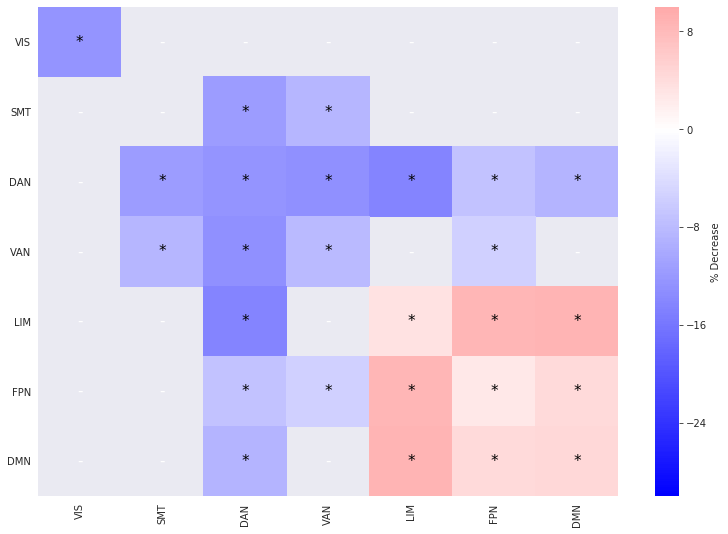

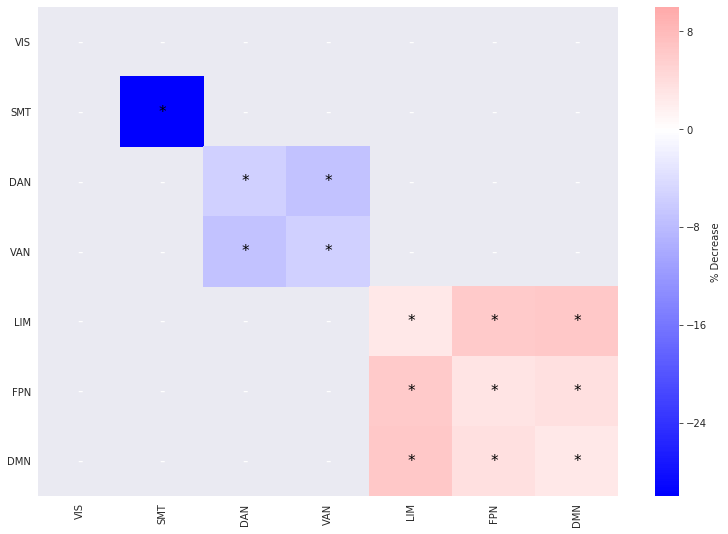

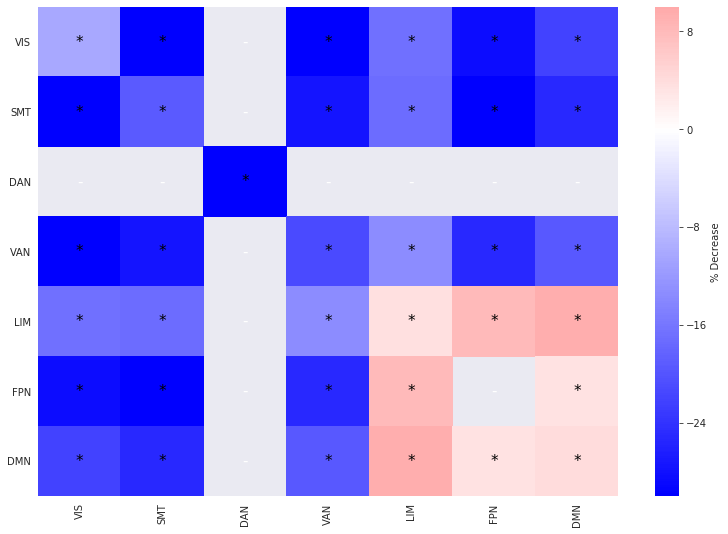

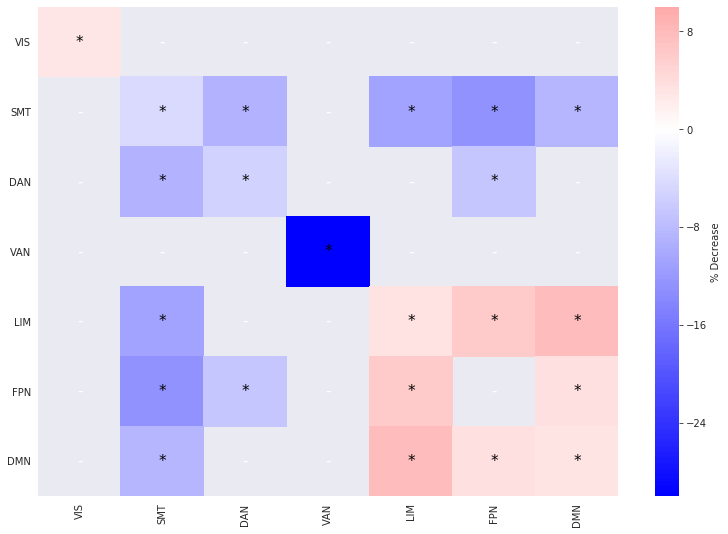

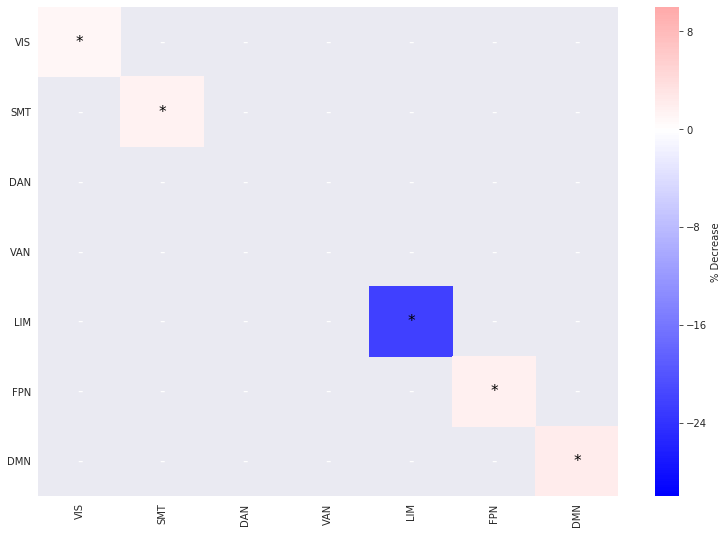

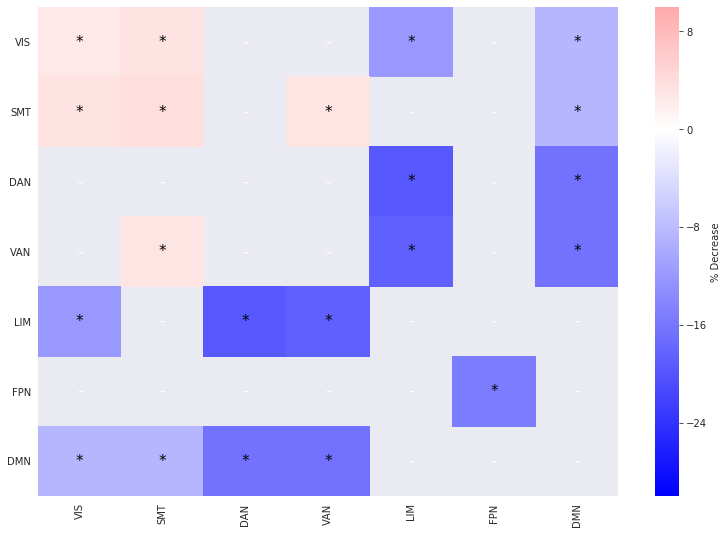

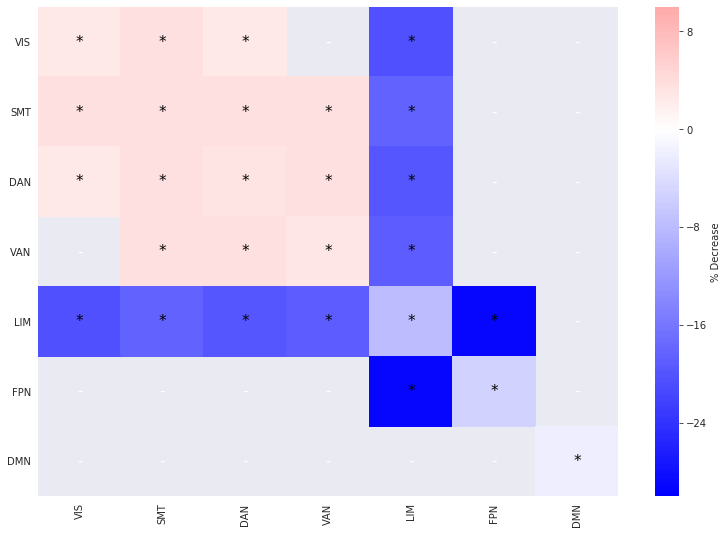

In [84]:
cmap = LinearSegmentedColormap.from_list('custom', ['blue', 'white', 'red'], N=256, gamma=1.0)
vmin = -30
vmax = 10

for i in range(7):
    heatmap_values = percent_change_all_ntwx_all_vals[i,:,:]
    boolean_array = corrected_all_ntwx_sig_tables[i]
    hmap_bool = heatmap_values*boolean_array
    hmap_bool[(hmap_bool == 0.0) | (hmap_bool == -0.0)] = 0.0    
#     cmap = sns.color_palette("RdBu_r")
#     cmap = sns.color_palette("summer")
    
    fig, ax = plt.subplots(figsize=(13,9))
    sns.heatmap(hmap_bool, annot=False, mask=np.logical_not(boolean_array), cmap=cmap, cbar_kws={'label': '% Decrease'}, linecolor='black',linewidth=0.00,center=0,vmin=vmin, vmax=vmax)
    for x in range(len(Ntwx_labels)):
        for y in range(len(Ntwx_labels)):
            value = hmap_bool[x, y]
            if value > -90:
                if value < 0.0:
                    ax.text(y + 0.5, x + 0.5, '*', ha='center', va='center', color='black', fontsize=15)
                elif value > 0.0:
                    ax.text(y + 0.5, x + 0.5, '*', ha='center', va='center', color='black', fontsize=15)
                elif value == 0.0:
                    ax.text(y + 0.5, x + 0.5, '-', ha='center', va='center', color='white', fontsize=15)
    ax.set_xticks(np.arange(len(Ntwx_labels)) + 0.5)
    ax.set_xticklabels(Ntwx_labels, rotation=90, ha='center')
    ax.set_yticks(np.arange(len(Ntwx_labels)) + 0.5)
    ax.set_yticklabels(Ntwx_labels, rotation=0, ha='right')
    plt.show()

### Box plots

In [6]:
# The following boxplots are used in Figures 4, 5, 6, and 7; PANEL B
# IMPORTANT: This notebook ONLY does resting-state ntwx interactions. 
# Please change the fc matrices to the task of your choice (motor, WM, or language to see those changes)

In [162]:
all_ltvs = []

for i in range(7):
    heatmap_values = percent_change_all_ntwx_all_vals[i,:,:]
    boolean_array = corrected_all_ntwx_sig_tables[i]
    hmap_bool = heatmap_values*boolean_array
    hmap_bool[(hmap_bool == 0.0) | (hmap_bool == -0.0)] = 0.0  

    matrix = hmap_bool.copy()


    # Set upper triangle values to 0
    matrix[np.triu_indices(matrix.shape[0], k=1)] = 0



    # Create boxplot
    data = [matrix[:4, :4].flatten(), matrix[4:, :4].flatten(), matrix[4:, 4:].flatten()]
    labels = ['Top', 'Middle', 'Bottom']
    
    # Extract lower triangle values that are non-zero ...
    lower_triangle_values = [data[0][data[0] != 0], data[1][data[1] != 0], data[2][data[2] != 0]]
    
    all_ltvs.append(lower_triangle_values)
    
    del matrix, data, labels, lower_triangle_values

In [163]:
lon_lesions_ltvs = all_ltvs[:4]
hon_lesions_ltvs = all_ltvs[4:]

In [164]:
# data = lon_lesions_ltvs.copy()

In [165]:
labels = ['LON<->LON', 'LON<->HON', 'HON<->HON']

In [166]:
lon_lesions_lon_conns = []
lon_lesions_lon_hon_conns = []
lon_lesions_hon_conns = []

for i in range(len(lon_lesions_ltvs)):
    lon_lesions_lon_conns.append(lon_lesions_ltvs[i][0])
    lon_lesions_lon_hon_conns.append(lon_lesions_ltvs[i][1])
    lon_lesions_hon_conns.append(lon_lesions_ltvs[i][2])

lon_lesions_lon_conns = np.concatenate(lon_lesions_lon_conns)
lon_lesions_lon_hon_conns = np.concatenate(lon_lesions_lon_hon_conns)
lon_lesions_hon_conns = np.concatenate(lon_lesions_hon_conns)

lon_lesions_lon_conns = lon_lesions_lon_conns.tolist()
lon_lesions_lon_hon_conns = lon_lesions_lon_hon_conns.tolist()
lon_lesions_hon_conns = lon_lesions_hon_conns.tolist()

In [167]:
data1 = lon_lesions_lon_conns.copy()
data2 = lon_lesions_lon_hon_conns.copy()
data3 = lon_lesions_hon_conns.copy()

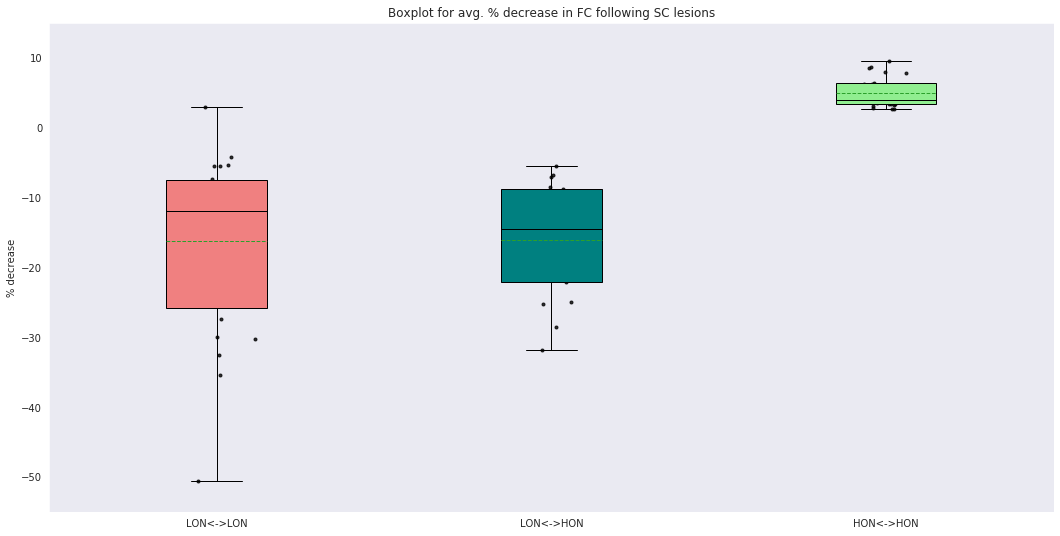

In [147]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(18,9))

# Create boxplots for each list of data with different colors
bp = ax.boxplot([data1, data2, data3], patch_artist=True, showmeans=True, meanline=True,
                boxprops=dict(facecolor='lightcoral'),  # Light red for LON<->LON
                medianprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))

# Fill each box plot with a different color
colors = ['lightcoral', 'teal', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
# Add labels and title
ax.set_xticklabels(['LON<->LON', 'LON<->HON', 'HON<->HON'])
ax.set_ylabel('% decrease')
ax.set_title('Boxplot for avg. % decrease in FC following SC lesions')

# Add individual values
for i, data in enumerate([data1, data2, data3]):
    x = np.random.normal(i + 1, 0.04, size=len(data))
    plt.plot(x, data, 'k.', alpha=0.8)

# Show the plot
plt.grid(False)
plt.ylim([-55,15])
plt.show()

In [172]:
A = data1.copy()
B = data2.copy()
C = data3.copy()

In [173]:
print(np.mean(A))
print(np.mean(B))
print(np.mean(C))

-16.252077692285656
-16.151283743942543
4.97010182393064


In [174]:
from scipy.stats import ttest_ind

# Define the lists A, B, and C
# Assuming you have already defined these lists

# Perform Welch's t-test between A and B
t_stat_AB, p_val_AB = ttest_ind(A, B, equal_var=False)

# Perform Welch's t-test between B and C
t_stat_BC, p_val_BC = ttest_ind(B, C, equal_var=False)

# Perform Welch's t-test between A and C
t_stat_AC, p_val_AC = ttest_ind(A, C, equal_var=False)

# Print the results
print("A vs B: t-statistic =", t_stat_AB, ", p-value =", p_val_AB)
print("B vs C: t-statistic =", t_stat_BC, ", p-value =", p_val_BC)
print("A vs C: t-statistic =", t_stat_AC, ", p-value =", p_val_AC)

A vs B: t-statistic = -0.02957404816498193 , p-value = 0.97657198603486
B vs C: t-statistic = -10.42222516450329 , p-value = 4.981140975324825e-09
A vs C: t-statistic = -7.518435934548545 , p-value = 1.5171482489937667e-07


In [175]:
hon_lesions_lon_conns = []
hon_lesions_lon_hon_conns = []
hon_lesions_hon_conns = []

for i in range(len(hon_lesions_ltvs)):
    hon_lesions_lon_conns.append(hon_lesions_ltvs[i][0])
    hon_lesions_lon_hon_conns.append(hon_lesions_ltvs[i][1])
    hon_lesions_hon_conns.append(hon_lesions_ltvs[i][2])

hon_lesions_lon_conns = np.concatenate(hon_lesions_lon_conns)
hon_lesions_lon_hon_conns = np.concatenate(hon_lesions_lon_hon_conns)
hon_lesions_hon_conns = np.concatenate(hon_lesions_hon_conns)

hon_lesions_lon_conns = hon_lesions_lon_conns.tolist()
hon_lesions_lon_hon_conns = hon_lesions_lon_hon_conns.tolist()
hon_lesions_hon_conns = hon_lesions_hon_conns.tolist()

In [176]:
data1 = hon_lesions_lon_conns.copy()
data2 = hon_lesions_lon_hon_conns.copy()
data3 = hon_lesions_hon_conns.copy()

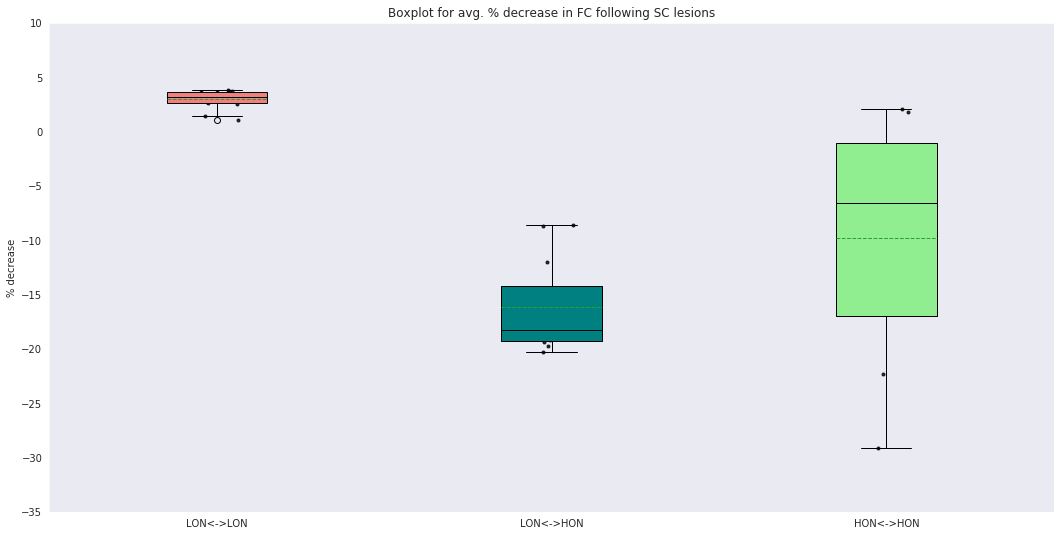

In [177]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(18,9))

# Create boxplots for each list of data with different colors
bp = ax.boxplot([data1, data2, data3], patch_artist=True, showmeans=True, meanline=True,
                boxprops=dict(facecolor='lightcoral'),  # Light red for LON<->LON
                medianprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))

# Fill each box plot with a different color
colors = ['lightcoral', 'teal', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
# Add labels and title
ax.set_xticklabels(['LON<->LON', 'LON<->HON', 'HON<->HON'])
ax.set_ylabel('% decrease')
ax.set_title('Boxplot for avg. % decrease in FC following SC lesions')

# Add individual values
for i, data in enumerate([data1, data2, data3]):
    x = np.random.normal(i + 1, 0.04, size=len(data))
    plt.plot(x, data, 'k.', alpha=0.8)

# Show the plot
plt.grid(False)
plt.ylim([-35,10])
plt.show()

In [178]:
A = data1.copy()
B = data2.copy()
C = data3.copy()

In [179]:
print(np.mean(A))
print(np.mean(B))
print(np.mean(C))

2.9712952099145857
-16.172363970646543
-9.77050452238809


In [180]:
from scipy.stats import ttest_ind

# Define the lists A, B, and C
# Assuming you have already defined these lists

# Perform Welch's t-test between A and B
t_stat_AB, p_val_AB = ttest_ind(A, B, equal_var=False)

# Perform Welch's t-test between B and C
t_stat_BC, p_val_BC = ttest_ind(B, C, equal_var=False)

# Perform Welch's t-test between A and C
t_stat_AC, p_val_AC = ttest_ind(A, C, equal_var=False)

# Print the results
print("A vs B: t-statistic =", t_stat_AB, ", p-value =", p_val_AB)
print("B vs C: t-statistic =", t_stat_BC, ", p-value =", p_val_BC)
print("A vs C: t-statistic =", t_stat_AC, ", p-value =", p_val_AC)

A vs B: t-statistic = 14.392091048028263 , p-value = 2.9331326771849364e-08
B vs C: t-statistic = -1.5026454291026319 , p-value = 0.16921537699909578
A vs C: t-statistic = 3.1395212915845727 , p-value = 0.016274345078236285


### Supplementary Info: Permutation Analysis

#### Shuffle values and Repeat 10000 times

In [181]:
def shuffle_lower_triangle(matrix):
    # Set upper triangle values to 0
    matrix[np.triu_indices_from(matrix, k=1)] = 0
    
    # Get lower triangle and diagonal values
    lower_triangle_values = matrix[np.tril_indices_from(matrix)]
    
    # Shuffle the lower triangle and diagonal values
    np.random.shuffle(lower_triangle_values)
    
    # Fill the lower triangle and diagonal with shuffled values
    matrix[np.tril_indices_from(matrix)] = lower_triangle_values
    
    return matrix

In [182]:
%%time
shuffled_all_ltvs = []

for j in range(10000):
    single_trial_ltvs = []
    for i in range(7):
        heatmap_values = percent_change_all_ntwx_all_vals[i,:,:]
        boolean_array = corrected_all_ntwx_sig_tables[i]
        hmap_bool = heatmap_values*boolean_array
        hmap_bool[(hmap_bool == 0.0) | (hmap_bool == -0.0)] = 0.0  

        matrix = hmap_bool.copy()


        shuffled_matrix = shuffle_lower_triangle(matrix)
        
        # Create boxplot
        data = [shuffled_matrix[:4, :4].flatten(), shuffled_matrix[4:, :4].flatten(), shuffled_matrix[4:, 4:].flatten()]
    
        # Extract lower triangle values that are non-zero ...
        lower_triangle_values2 = [data[0][data[0] != 0], data[1][data[1] != 0], data[2][data[2] != 0]]

        single_trial_ltvs.append(lower_triangle_values2)

        del matrix, data, lower_triangle_values2
        
    shuffled_all_ltvs.append(single_trial_ltvs)

CPU times: user 8.13 s, sys: 8.83 ms, total: 8.14 s
Wall time: 8.14 s


In [183]:
%%time
shuffled_lon_lesions_lon_conns = []
shuffled_lon_lesions_lon_hon_conns = []
shuffled_lon_lesions_hon_conns = []

for i in range(10000):
    
    _all_ltvs = shuffled_all_ltvs[i]

    lon_lesions_ltvs = _all_ltvs[:4]
    hon_lesions_ltvs = _all_ltvs[4:]

    lon_lesions_lon_conns = []
    lon_lesions_lon_hon_conns = []
    lon_lesions_hon_conns = []

    for j in range(len(lon_lesions_ltvs)):
        lon_lesions_lon_conns.append(lon_lesions_ltvs[j][0])
        lon_lesions_lon_hon_conns.append(lon_lesions_ltvs[j][1])
        lon_lesions_hon_conns.append(lon_lesions_ltvs[j][2])

    lon_lesions_lon_conns = np.concatenate(lon_lesions_lon_conns)
    lon_lesions_lon_hon_conns = np.concatenate(lon_lesions_lon_hon_conns)
    lon_lesions_hon_conns = np.concatenate(lon_lesions_hon_conns)

    lon_lesions_lon_conns = lon_lesions_lon_conns.tolist()
    lon_lesions_lon_hon_conns = lon_lesions_lon_hon_conns.tolist()
    lon_lesions_hon_conns = lon_lesions_hon_conns.tolist()

    data1 = lon_lesions_lon_conns.copy()
    data2 = lon_lesions_lon_hon_conns.copy()
    data3 = lon_lesions_hon_conns.copy()
    
    shuffled_lon_lesions_lon_conns.append(data1)
    shuffled_lon_lesions_lon_hon_conns.append(data2)
    shuffled_lon_lesions_hon_conns.append(data3)

CPU times: user 170 ms, sys: 13.1 ms, total: 183 ms
Wall time: 181 ms


In [184]:
A = shuffled_lon_lesions_lon_conns.copy()
B = shuffled_lon_lesions_lon_hon_conns.copy()
C = shuffled_lon_lesions_hon_conns.copy()

In [187]:
%%time
all_shuffles_ttestsAB = []
all_shuffles_ttestsBC = []
all_shuffles_ttestsAC = []

all_shuffles_pvalsAB = []
all_shuffles_pvalsBC = []
all_shuffles_pvalsAC = []

for i in range(10000):
    
    # Perform Welch's t-test between A and B
    t_stat_AB, p_val_AB = ttest_ind(A[i], B[i], equal_var=False)

    # Perform Welch's t-test between B and C
    t_stat_BC, p_val_BC = ttest_ind(B[i], C[i], equal_var=False)

    # Perform Welch's t-test between A and C
    t_stat_AC, p_val_AC = ttest_ind(A[i], C[i], equal_var=False)
    
    all_shuffles_ttestsAB.append(t_stat_AB)
    all_shuffles_ttestsBC.append(t_stat_BC)
    all_shuffles_ttestsAC.append(t_stat_AC)
    
    all_shuffles_pvalsAB.append(p_val_AB)
    all_shuffles_pvalsBC.append(p_val_BC)
    all_shuffles_pvalsAC.append(p_val_AC)
    
    
    del t_stat_AB, p_val_AB, t_stat_BC, p_val_BC, t_stat_AC, p_val_AC

CPU times: user 12.4 s, sys: 17.5 ms, total: 12.4 s
Wall time: 12.4 s


In [189]:
len(all_shuffles_ttestsAB)

10000

In [195]:
sns.set_style('whitegrid')

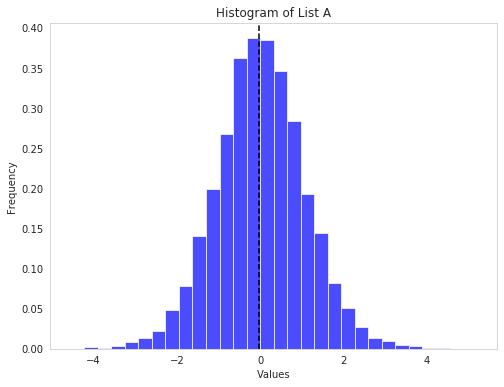

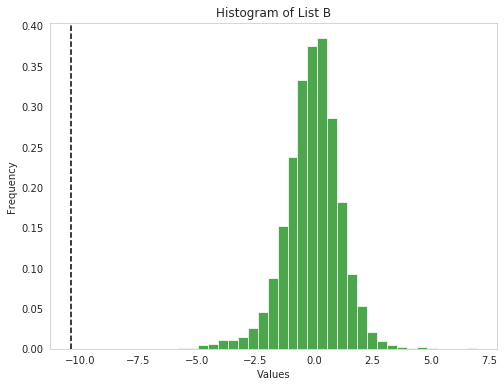

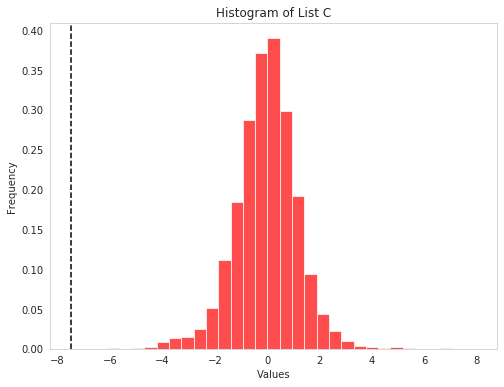

In [196]:
# Assuming A, B, and C are your lists

# Plot histogram/pdf for list A
plt.figure(figsize=(8, 6))
plt.hist(all_shuffles_ttestsAB, bins=30, color='blue', alpha=0.7, density=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of List A')
plt.grid(False)
plt.axvline(-0.03, color='k', linestyle='--') # A is the observed mean. scroll up for value!

plt.show()

# Plot histogram/pdf for list B
plt.figure(figsize=(8, 6))
plt.hist(all_shuffles_ttestsBC, bins=30, color='green', alpha=0.7, density=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of List B')
plt.grid(False)
plt.axvline(-10.4, color='k', linestyle='--') # B is the observed mean. scroll up for value!

plt.show()

# Plot histogram/pdf for list C
plt.figure(figsize=(8, 6))
plt.hist(all_shuffles_ttestsAC, bins=30, color='red', alpha=0.7, density=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of List C')
plt.grid(False)
plt.axvline(-7.5, color='k', linestyle='--') # C is the observed mean. scroll up for value!

plt.show()

In [109]:
# A vs B: t-statistic = -0.02957404816498193 , p-value = 0.97657198603486
# B vs C: t-statistic = -10.42222516450329 , p-value = 4.981140975324825e-09
# A vs C: t-statistic = -7.518435934548545 , p-value = 1.5171482489937667e-07

In [200]:
big_shuffled_lon_lesions_lon_conns = []
big_shuffled_lon_lesions_lon_hon_conns = []
big_shuffled_lon_lesions_hon_conns = []

for i in range(10000):
    big_shuffled_lon_lesions_lon_conns.append(shuffled_lon_lesions_lon_conns[i])
    big_shuffled_lon_lesions_lon_hon_conns.append(shuffled_lon_lesions_lon_hon_conns[i])
    big_shuffled_lon_lesions_hon_conns.append(shuffled_lon_lesions_hon_conns[i])

big_shuffled_lon_lesions_lon_conns = np.concatenate(big_shuffled_lon_lesions_lon_conns)
big_shuffled_lon_lesions_lon_hon_conns = np.concatenate(big_shuffled_lon_lesions_lon_hon_conns)
big_shuffled_lon_lesions_hon_conns = np.concatenate(big_shuffled_lon_lesions_hon_conns)

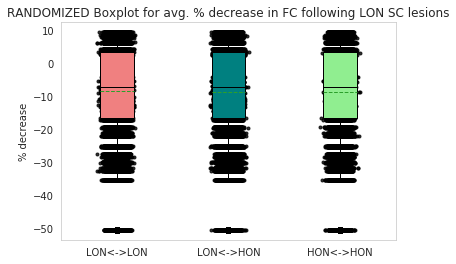

In [201]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create boxplots for each list of data with different colors
bp = ax.boxplot([big_shuffled_lon_lesions_lon_conns, big_shuffled_lon_lesions_lon_hon_conns, big_shuffled_lon_lesions_hon_conns], patch_artist=True, showmeans=True, meanline=True,
                boxprops=dict(facecolor='lightcoral'),  # Light red for LON<->LON
                medianprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))

# Fill each box plot with a different color
colors = ['lightcoral', 'teal', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
# Add labels and title
ax.set_xticklabels(['LON<->LON', 'LON<->HON', 'HON<->HON'])
ax.set_ylabel('% decrease')
ax.set_title('RANDOMIZED Boxplot for avg. % decrease in FC following LON SC lesions')

# Add individual values
for i, data in enumerate([big_shuffled_lon_lesions_lon_conns, big_shuffled_lon_lesions_lon_hon_conns, big_shuffled_lon_lesions_hon_conns]):
    x = np.random.normal(i + 1, 0.04, size=len(data))
    plt.plot(x, data, 'k.', alpha=0.8)

# Show the plot
plt.grid(False)
plt.show()

In [113]:
A = big_shuffled_lon_lesions_lon_conns.copy()
B = big_shuffled_lon_lesions_lon_hon_conns.copy()
C = big_shuffled_lon_lesions_hon_conns.copy()

# Define the lists A, B, and C
# Assuming you have already defined these lists

# Perform Welch's t-test between A and B
t_stat_AB, p_val_AB = ttest_ind(A, B, equal_var=False)

# Perform Welch's t-test between B and C
t_stat_BC, p_val_BC = ttest_ind(B, C, equal_var=False)

# Perform Welch's t-test between A and C
t_stat_AC, p_val_AC = ttest_ind(A, C, equal_var=False)

# Print the results
print("A vs B: t-statistic =", t_stat_AB, ", p-value =", p_val_AB)
print("B vs C: t-statistic =", t_stat_BC, ", p-value =", p_val_BC)
print("A vs C: t-statistic =", t_stat_AC, ", p-value =", p_val_AC)

A vs B: t-statistic = -0.05980078510305467 , p-value = 0.952314326073266
B vs C: t-statistic = 0.46230989093995173 , p-value = 0.6438594923864486
A vs C: t-statistic = 0.3978721960961791 , p-value = 0.6907247043191196


In [114]:
from scipy.stats import norm

In [115]:
# Calculate the 95% confidence interval for the mean
# We use the z-score for a 95% confidence level, which is approximately 1.96

mu, std = norm.fit(means_big_shuffled_lon_lesions_lon_conns)

z_score = 1.96
ci_lower = mu - z_score * (std / np.sqrt(len(means_big_shuffled_lon_lesions_lon_conns)))
ci_upper = mu + z_score * (std / np.sqrt(len(means_big_shuffled_lon_lesions_lon_conns)))

plt.hist(means_big_shuffled_lon_lesions_lon_conns,bins=50,density=True,alpha=0.8,color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the PDF
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(False)

# Plot the 95% confidence interval as dashed vertical lines
# plt.axvline(ci_lower, color='k', linestyle='--')
# plt.axvline(ci_upper, color='k', linestyle='--')

plt.axvline(np.mean(A), color='k', linestyle='--') # A is the observed mean. scroll up for value!

plt.show()

NameError: name 'means_big_shuffled_lon_lesions_lon_conns' is not defined

In [ ]:
np.sum(means_big_shuffled_lon_lesions_lon_conns<np.mean(A))    

In [ ]:
11/10000

In [ ]:
# Calculate the 95% confidence interval for the mean
# We use the z-score for a 95% confidence level, which is approximately 1.96

mu, std = norm.fit(means_big_shuffled_lon_lesions_lon_hon_conns)

z_score = 1.96
ci_lower = mu - z_score * (std / np.sqrt(len(means_big_shuffled_lon_lesions_lon_hon_conns)))
ci_upper = mu + z_score * (std / np.sqrt(len(means_big_shuffled_lon_lesions_lon_hon_conns)))

plt.hist(means_big_shuffled_lon_lesions_lon_hon_conns,bins=50,density=True,alpha=0.8,color='r')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the PDF
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(False)

# Plot the 95% confidence interval as dashed vertical lines
# plt.axvline(ci_lower, color='k', linestyle='--')
# plt.axvline(ci_upper, color='k', linestyle='--')

plt.axvline(np.mean(B), color='k', linestyle='--') # B is the observed mean. scroll up for value!

plt.show()

In [ ]:
np.sum(means_big_shuffled_lon_lesions_lon_hon_conns<np.mean(B))    

In [ ]:
1/10000

In [ ]:
# Calculate the 95% confidence interval for the mean
# We use the z-score for a 95% confidence level, which is approximately 1.96

mu, std = norm.fit(means_big_shuffled_lon_lesions_hon_conns)

z_score = 1.96
ci_lower = mu - z_score * (std / np.sqrt(len(means_big_shuffled_lon_lesions_hon_conns)))
ci_upper = mu + z_score * (std / np.sqrt(len(means_big_shuffled_lon_lesions_hon_conns)))

plt.hist(means_big_shuffled_lon_lesions_hon_conns,bins=50,density=True,alpha=0.8,color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the PDF
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(False)

# Plot the 95% confidence interval as dashed vertical lines
# plt.axvline(ci_lower, color='k', linestyle='--')
# plt.axvline(ci_upper, color='k', linestyle='--')

plt.axvline(np.mean(C), color='k', linestyle='--') # C is the observed mean. scroll up for value!

plt.show()

In [ ]:
np.sum(means_big_shuffled_lon_lesions_hon_conns>np.mean(C))    

In [ ]:
0/10000

In [191]:
%%time
shuffled_hon_lesions_lon_conns = []
shuffled_hon_lesions_lon_hon_conns = []
shuffled_hon_lesions_hon_conns = []

for i in range(10000):
    
    _all_ltvs = shuffled_all_ltvs[i]

    lon_lesions_ltvs = _all_ltvs[:4]
    hon_lesions_ltvs = _all_ltvs[4:]

    hon_lesions_lon_conns = []
    hon_lesions_lon_hon_conns = []
    hon_lesions_hon_conns = []

    for j in range(len(hon_lesions_ltvs)):
        hon_lesions_lon_conns.append(hon_lesions_ltvs[j][0])
        hon_lesions_lon_hon_conns.append(hon_lesions_ltvs[j][1])
        hon_lesions_hon_conns.append(hon_lesions_ltvs[j][2])

    hon_lesions_lon_conns = np.concatenate(hon_lesions_lon_conns)
    hon_lesions_lon_hon_conns = np.concatenate(hon_lesions_lon_hon_conns)
    hon_lesions_hon_conns = np.concatenate(hon_lesions_hon_conns)

    hon_lesions_lon_conns = hon_lesions_lon_conns.tolist()
    hon_lesions_lon_hon_conns = hon_lesions_lon_hon_conns.tolist()
    hon_lesions_hon_conns = hon_lesions_hon_conns.tolist()

    data1 = hon_lesions_lon_conns.copy()
    data2 = hon_lesions_lon_hon_conns.copy()
    data3 = hon_lesions_hon_conns.copy()
    
    shuffled_hon_lesions_lon_conns.append(data1)
    shuffled_hon_lesions_lon_hon_conns.append(data2)
    shuffled_hon_lesions_hon_conns.append(data3)

CPU times: user 143 ms, sys: 7.04 ms, total: 150 ms
Wall time: 149 ms


In [192]:
A = shuffled_hon_lesions_lon_conns.copy()
B = shuffled_hon_lesions_lon_hon_conns.copy()
C = shuffled_hon_lesions_hon_conns.copy()

In [193]:
%%time
all_shuffles_ttestsAB = []
all_shuffles_ttestsBC = []
all_shuffles_ttestsAC = []

all_shuffles_pvalsAB = []
all_shuffles_pvalsBC = []
all_shuffles_pvalsAC = []

for i in range(10000):
    
    # Perform Welch's t-test between A and B
    t_stat_AB, p_val_AB = ttest_ind(A[i], B[i], equal_var=False)

    # Perform Welch's t-test between B and C
    t_stat_BC, p_val_BC = ttest_ind(B[i], C[i], equal_var=False)

    # Perform Welch's t-test between A and C
    t_stat_AC, p_val_AC = ttest_ind(A[i], C[i], equal_var=False)
    
    all_shuffles_ttestsAB.append(t_stat_AB)
    all_shuffles_ttestsBC.append(t_stat_BC)
    all_shuffles_ttestsAC.append(t_stat_AC)
    
    all_shuffles_pvalsAB.append(p_val_AB)
    all_shuffles_pvalsBC.append(p_val_BC)
    all_shuffles_pvalsAC.append(p_val_AC)
    
    
    del t_stat_AB, p_val_AB, t_stat_BC, p_val_BC, t_stat_AC, p_val_AC

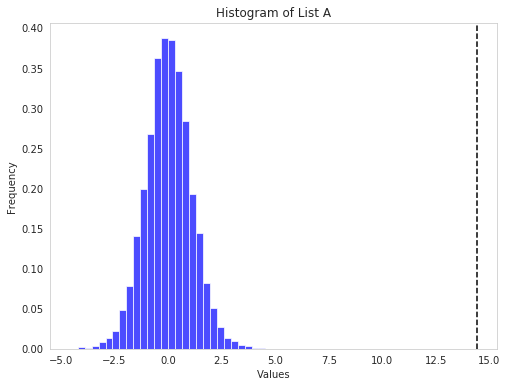

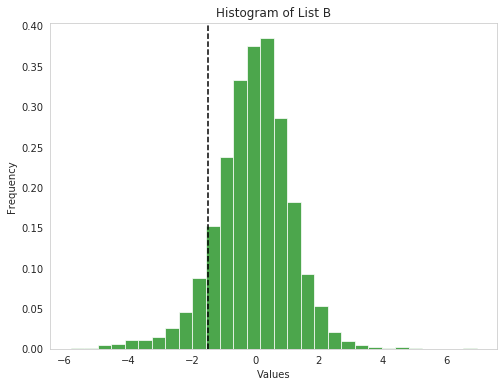

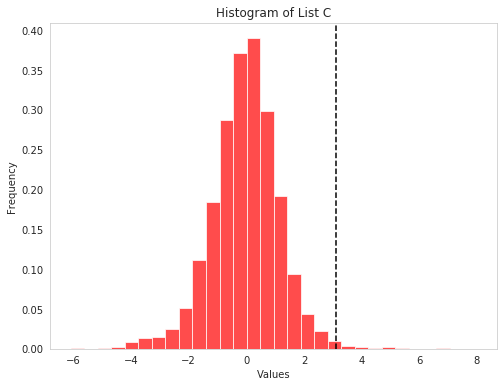

In [197]:
# Assuming A, B, and C are your lists

# Plot histogram/pdf for list A
plt.figure(figsize=(8, 6))
plt.hist(all_shuffles_ttestsAB, bins=30, color='blue', alpha=0.7, density=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of List A')
plt.grid(False)
plt.axvline(14.4, color='k', linestyle='--') # A is the observed mean. scroll up for value!

plt.show()

# Plot histogram/pdf for list B
plt.figure(figsize=(8, 6))
plt.hist(all_shuffles_ttestsBC, bins=30, color='green', alpha=0.7, density=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of List B')
plt.grid(False)
plt.axvline(-1.5, color='k', linestyle='--') # A is the observed mean. scroll up for value!

plt.show()

# Plot histogram/pdf for list C
plt.figure(figsize=(8, 6))
plt.hist(all_shuffles_ttestsAC, bins=30, color='red', alpha=0.7, density=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of List C')
plt.grid(False)
plt.axvline(3.1, color='k', linestyle='--') # A is the observed mean. scroll up for value!

plt.show()

In [ ]:
# A vs B: t-statistic = 14.392091048028263 , p-value = 2.9331326771849364e-08
# B vs C: t-statistic = -1.5026454291026319 , p-value = 0.16921537699909578
# A vs C: t-statistic = 3.1395212915845727 , p-value = 0.016274345078236285

In [198]:
big_shuffled_hon_lesions_lon_conns = []
big_shuffled_hon_lesions_lon_hon_conns = []
big_shuffled_hon_lesions_hon_conns = []

for i in range(10000):
    big_shuffled_hon_lesions_lon_conns.append(shuffled_hon_lesions_lon_conns[i])
    big_shuffled_hon_lesions_lon_hon_conns.append(shuffled_hon_lesions_lon_hon_conns[i])
    big_shuffled_hon_lesions_hon_conns.append(shuffled_hon_lesions_hon_conns[i])

big_shuffled_hon_lesions_lon_conns = np.concatenate(big_shuffled_hon_lesions_lon_conns)
big_shuffled_hon_lesions_lon_hon_conns = np.concatenate(big_shuffled_hon_lesions_lon_hon_conns)
big_shuffled_hon_lesions_hon_conns = np.concatenate(big_shuffled_hon_lesions_hon_conns)

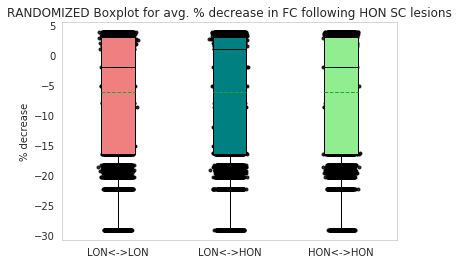

In [199]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create boxplots for each list of data with different colors
bp = ax.boxplot([big_shuffled_hon_lesions_lon_conns, big_shuffled_hon_lesions_lon_hon_conns, big_shuffled_hon_lesions_hon_conns], patch_artist=True, showmeans=True, meanline=True,
                boxprops=dict(facecolor='lightcoral'),  # Light red for LON<->LON
                medianprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))

# Fill each box plot with a different color
colors = ['lightcoral', 'teal', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
# Add labels and title
ax.set_xticklabels(['LON<->LON', 'LON<->HON', 'HON<->HON'])
ax.set_ylabel('% decrease')
ax.set_title('RANDOMIZED Boxplot for avg. % decrease in FC following HON SC lesions')

# Add individual values
for i, data in enumerate([big_shuffled_hon_lesions_lon_conns, big_shuffled_hon_lesions_lon_hon_conns, big_shuffled_hon_lesions_hon_conns]):
    x = np.random.normal(i + 1, 0.04, size=len(data))
    plt.plot(x, data, 'k.', alpha=0.8)

# Show the plot
plt.grid(False)
plt.show()

In [131]:
A = big_shuffled_hon_lesions_lon_conns.copy()
B = big_shuffled_hon_lesions_lon_hon_conns.copy()
C = big_shuffled_hon_lesions_hon_conns.copy()

# Define the lists A, B, and C
# Assuming you have already defined these lists

# Perform Welch's t-test between A and B
t_stat_AB, p_val_AB = ttest_ind(A, B, equal_var=False)

# Perform Welch's t-test between B and C
t_stat_BC, p_val_BC = ttest_ind(B, C, equal_var=False)

# Perform Welch's t-test between A and C
t_stat_AC, p_val_AC = ttest_ind(A, C, equal_var=False)

# Print the results
print("A vs B: t-statistic =", t_stat_AB, ", p-value =", p_val_AB)
print("B vs C: t-statistic =", t_stat_BC, ", p-value =", p_val_BC)
print("A vs C: t-statistic =", t_stat_AC, ", p-value =", p_val_AC)

A vs B: t-statistic = 0.457092020301039 , p-value = 0.6476052889211477
B vs C: t-statistic = -0.390531028320874 , p-value = 0.696144490225938
A vs C: t-statistic = -0.00033332874083231176 , p-value = 0.9997340425856126


In [132]:
means_big_shuffled_hon_lesions_lon_conns = []
means_big_shuffled_hon_lesions_lon_hon_conns = []
means_big_shuffled_hon_lesions_hon_conns = []

for i in range(10000):
    means_big_shuffled_hon_lesions_lon_conns.append(np.mean(shuffled_hon_lesions_lon_conns[i]))
    means_big_shuffled_hon_lesions_lon_hon_conns.append(np.mean(shuffled_hon_lesions_lon_hon_conns[i]))
    means_big_shuffled_hon_lesions_hon_conns.append(np.mean(shuffled_hon_lesions_hon_conns[i]))

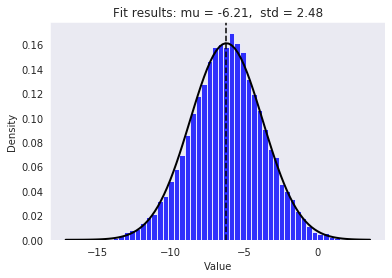

In [133]:
# Calculate the 95% confidence interval for the mean
# We use the z-score for a 95% confidence level, which is approximately 1.96

mu, std = norm.fit(means_big_shuffled_hon_lesions_lon_conns)

z_score = 1.96
ci_lower = mu - z_score * (std / np.sqrt(len(means_big_shuffled_hon_lesions_lon_conns)))
ci_upper = mu + z_score * (std / np.sqrt(len(means_big_shuffled_hon_lesions_lon_conns)))

plt.hist(means_big_shuffled_hon_lesions_lon_conns,bins=50,density=True,alpha=0.8,color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the PDF
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(False)

# Plot the 95% confidence interval as dashed vertical lines
# plt.axvline(ci_lower, color='k', linestyle='--')
# plt.axvline(ci_upper, color='k', linestyle='--')

plt.axvline(np.mean(A), color='k', linestyle='--') # A is the observed mean. scroll up for value!

plt.show()

In [134]:
np.sum(means_big_shuffled_hon_lesions_lon_conns>np.mean(A))    

5046

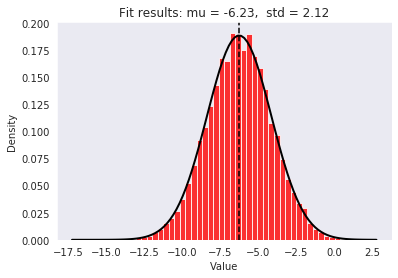

In [135]:
# Calculate the 95% confidence interval for the mean
# We use the z-score for a 95% confidence level, which is approximately 1.96

mu, std = norm.fit(means_big_shuffled_hon_lesions_lon_hon_conns)

z_score = 1.96
ci_lower = mu - z_score * (std / np.sqrt(len(means_big_shuffled_hon_lesions_lon_hon_conns)))
ci_upper = mu + z_score * (std / np.sqrt(len(means_big_shuffled_hon_lesions_lon_hon_conns)))

plt.hist(means_big_shuffled_hon_lesions_lon_hon_conns,bins=50,density=True,alpha=0.8,color='r')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the PDF
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(False)

# Plot the 95% confidence interval as dashed vertical lines
# plt.axvline(ci_lower, color='k', linestyle='--')
# plt.axvline(ci_upper, color='k', linestyle='--')

plt.axvline(np.mean(B), color='k', linestyle='--') # B is the observed mean. scroll up for value!

plt.show()

In [136]:
np.sum(means_big_shuffled_hon_lesions_lon_hon_conns<np.mean(B))    

5009

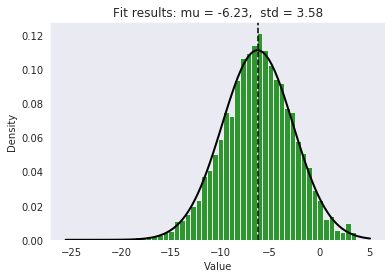

In [137]:
# Calculate the 95% confidence interval for the mean
# We use the z-score for a 95% confidence level, which is approximately 1.96

mu, std = norm.fit(means_big_shuffled_hon_lesions_hon_conns)

z_score = 1.96
ci_lower = mu - z_score * (std / np.sqrt(len(means_big_shuffled_hon_lesions_hon_conns)))
ci_upper = mu + z_score * (std / np.sqrt(len(means_big_shuffled_hon_lesions_hon_conns)))

plt.hist(means_big_shuffled_hon_lesions_hon_conns,bins=50,density=True,alpha=0.8,color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the PDF
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(False)

# Plot the 95% confidence interval as dashed vertical lines
# plt.axvline(ci_lower, color='k', linestyle='--')
# plt.axvline(ci_upper, color='k', linestyle='--')

plt.axvline(np.mean(C), color='k', linestyle='--') # C is the observed mean. scroll up for value!

plt.show()

In [138]:
np.mean(C)

-6.212491976237528